# Capstone Assignment 20.1: Initial Report and EDA

**Overview**: In this assignment, I present the selected dataset associated with my capstone project, and the initial work corresponding to data and task understanding within the CRISP-DM context, and a comparison of classification models as described in the problem statement below.



## Capstone Problem Statement


###Topic: Credit Default Prediction
The objective of the project will be to build the best possible classification model to predict whether a person will default on a loan, based on a set of personal and contextual attributes.

###Data Source
I originally envisioned this project making use of "historical information on credit clients, including amount of the loan, its length, what the intended use for it was, and whether or not the customer defaulted on the loan, as well as personal information such as age, income, marital status, whether or not they own their home, etc." (from my Capstone Assignment 16.1). After seeking datasets that would conform to this ideal, I settled on the following:

**AmExpert 2021 Code Lab** (https://www.kaggle.com/datasets/pradip11/amexpert-codelab-2021/data)

This dataset is associated with a contest hosted by American Express on the platform HackerEarth, in which contestants were to build the best classification model possible using the training set provided and make predictions for the target variable (credit_card_default), which is missing from the data in the test set. The contest was open from November 23 to December 19 of the year 2021. Announcements on the winners are still visible at https://www.hackerearth.com/challenges/new/competitive/amexpert-code-lab/ (though the data sets are not; those were obtained from the Kaggle link posted above).




## Reading in the Data

I will only use the train.csv file to train and test different models, as this is the file that contains the actual values of the target variable. This set contains a total of 45,528 rows.

In [1]:
##For use with Google Colab only
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libraries/packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder,  MinMaxScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
import time




In [153]:
##If using Google colab:
#data = pd.read_csv('/content/drive/My Drive/Berkeley/data/capstone/train.csv', sep = ',')

data = pd.read_csv('train.csv', sep = ',')

In [8]:
data.head()

customer_id            name  age gender owns_car owns_house  no_of_children  \
0  CST_115179        ita Bose   46      F        N          Y             0.0   
1  CST_121920  Alper Jonathan   29      M        N          Y             0.0   
2  CST_109330     Umesh Desai   37      M        N          Y             0.0   
3  CST_128288             Rie   39      F        N          Y             0.0   
4  CST_151355          McCool   46      M        Y          Y             0.0   

   net_yearly_income  no_of_days_employed occupation_type  \
0          107934.04                612.0         Unknown   
1          109862.62               2771.0        Laborers   
2          230153.17                204.0        Laborers   
3          122325.82              11941.0      Core staff   
4          387286.00               1459.0      Core staff   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   1.0             1.0              33070.28      18690.93   
1                   2.0             0.0              15329.53      37745.19   
2                   2.0             0.0              48416.60      41598.36   
3                   2.0             0.0              22574.36      32627.76   
4                   1.0             0.0              38282.95      52950.64   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  \
0                    73         544.0              2                        1   
1                    52         857.0              0                        0   
2                    43         650.0              0                        0   
3                    20         754.0              0                        0   
4                    75         927.0              0                        0   

   credit_card_default  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0

## Examining the Features


The following are the descriptions of the features in the dataset:


```
Column Name	Description
1. customer_id:	 unique identification of customer
2. name:  	name of customer
3. age:	age of customer (Years)
4. gender:	gender of customer (M or F)
5. owns_car:	whether a customer owns a car (Y or N)
6. owns_house:	whether a customer owns a house (Y or N)
7. no_of_children:	number of children of a customer
8. net_yearly_income:	net yearly income of a customer (USD)
9. no_of_days_employed:	no. of days employed
10. occupation_type:	occupation type of customer
11. total_family_members:	no. of family members of customer
12. migrant_worker:	customer is migrant worker (Yes or No)
13. yearly_debt_payments:	yearly debt of customer (USD)
14. credit_limit:	credit limit of customer (USD)
15. credit_limit_used(%):	credit limit used by customer
16. credit_score:	credit score of customer
17. prev_defaults:	no. of previous defaults
18. default_in_last_6months:	whether a customer has defaulted (Yes or No)
19. credit_card_default:	whether there will be credit card default (Yes or No)  **this is the target variable**
```




##Data Understanding and Preparation
###Basic examination of dataset

In [9]:
#Explore data types and number of values (any missing?)
print(data.shape)
data.info()

(45528, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_lim

From the data information we can already see that some columns have missing values.

In [10]:
data.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

Since the dataset is so vast, eliminating the rows with missing values will still leave plenty of data for training and testing a variety of models.

In [154]:
#Drop rows with missing values
data.dropna(inplace = True)
print(data.shape)

(43509, 19)


Here is the breakdown of features in the dataset by data type:


| Categorical Features   | Quantitative Features     |
| ------------- | -----------------|
| gender| age |
| owns_car| no_of_children |  
| owns_house| net_yearly_income|
| occupation_type| no_of_days_employed|
| migrant_worker| total_family_members|
| default_in_last_6months| yearly_debt_payments|
| credit_card_default [^]| credit_limit|
| | credit_limit_used(%)|
| | credit_score|
| | prev_defaults|

**Note**: from our initial exploration of the dataset, we notice that the following categorical features are already coded numerically: migrant_worker, default_in_last_6months, and credit_card_default (the target variable); all of these are binary variables with numerical codes 0 = "no" and 1 = "yes".

Some feature names may become cumbersome to work with throughout the project so I will rename them.

In [155]:
#Rename some variables
data.rename(columns={'owns_car': 'car', 'owns_house': 'house', 'no_of_children': 'children',
                     'net_yearly_income': 'income', 'no_of_days_employed': 'days',
                     'occupation_type': 'occupation', 'total_family_members': "family",
                     'migrant_worker': 'migrant', 'yearly_debt_payments': 'payments',
                     'credit_limit_used(%)': 'pct', 'default_in_last_6months': 'default6months',
                     'credit_card_default': 'y'}, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43509 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     43509 non-null  object 
 1   name            43509 non-null  object 
 2   age             43509 non-null  int64  
 3   gender          43509 non-null  object 
 4   car             43509 non-null  object 
 5   house           43509 non-null  object 
 6   children        43509 non-null  float64
 7   income          43509 non-null  float64
 8   days            43509 non-null  float64
 9   occupation      43509 non-null  object 
 10  family          43509 non-null  float64
 11  migrant         43509 non-null  float64
 12  payments        43509 non-null  float64
 13  credit_limit    43509 non-null  float64
 14  pct             43509 non-null  int64  
 15  credit_score    43509 non-null  float64
 16  prev_defaults   43509 non-null  int64  
 17  default6months  43509 non-null  int6

###Response feature 'credit_card_default'
The last column of the dataframe ('credit_card_default') is the response feature that the classifiers will need to predict. It is a categorical (binary) feature that has already been coded as "0" for clients who did not default on their credit card, and "1" for those who did.

####Checking for balance
In a classification problem it is important to assess whether the classes in the response feature are balanced.

In [17]:
#Breakdown of response feature 'credit_card_default' in absolute and relative terms
print('Value Counts for response variable: ', data['y'].value_counts())
print()
print('In proportions: ', data['y'].value_counts(normalize = True))

Value Counts for response variable:  y
0    39978
1     3531
Name: count, dtype: int64

In proportions:  y
0    0.918844
1    0.081156
Name: proportion, dtype: float64


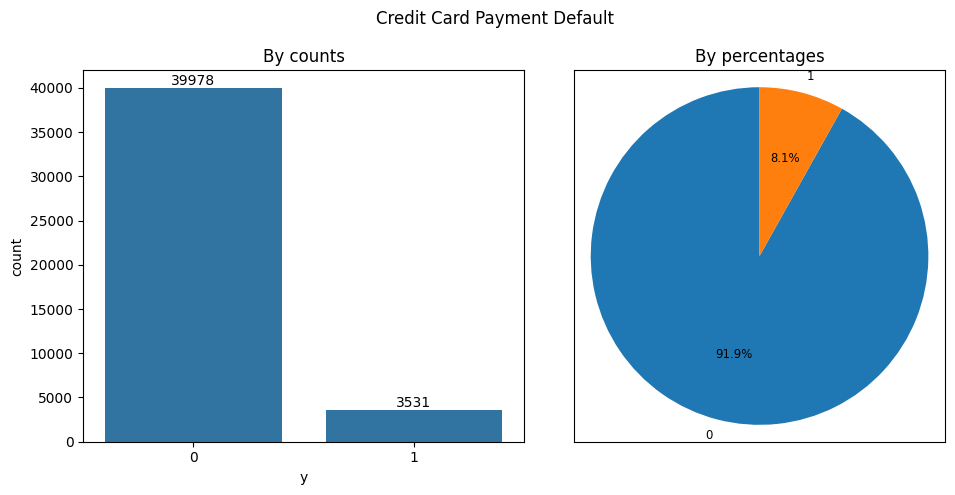

In [18]:
#Visual representation
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Credit Card Payment Default')
#First plot: counts (bar chart)
sns.countplot(ax = axes[0], x=data['y'])
axes[0].set_title('By counts')
axes[0].bar_label(axes[0].containers[0])
#Second plot: percentages (pie chart)
axes[1].pie(x=data.y.value_counts(), labels=data.y.value_counts().index, autopct='%1.1f%%', frame = True, \
            textprops = {'size': 'smaller'}, startangle = 90)
axes[1].set_title('By percentages')
axes[1].set(xticklabels = [], xlabel = None, yticklabels = [], ylabel = None)
axes[1].tick_params(bottom = False, left = False)
plt.tight_layout()
plt.show()

The response variable is clearly unbalanced (which immediately implies that we shouldn't use accuracy as a metric for comparing the models, and instead we ought to focus on the elements in a confusion matrix such as precision and recall).

Now we officially separate the explanatory features as matrix $X$ and the target variable as vector $y$, and proceed to explore the characteristics of the explanatory features in the set.


In [20]:
#Separate dataset into X and y:

X = data.drop('y', axis = 1)
y = data['y']

print(f'shape of X: {X.shape}')
print(f'shape of y: {y.shape}')

shape of X: (43509, 18)
shape of y: (43509,)


## **Exploratory Data Analysis Quantitative Features**



###NUMERICAL SUMMARIES

###All quantitative features in dataset

In [21]:
#Table summary - descriptive statistics
X.describe().T #transpose the output for a better fit in the screen

count           mean            std       min        25%  \
age             43509.0      38.997885       9.543480     23.00      31.00   
children        43509.0       0.420947       0.724627      0.00       0.00   
income          43509.0  200896.783673  684052.234568  27170.61  126289.00   
days            43509.0   67631.328438  139341.558948      2.00     937.00   
family          43509.0       2.159002       0.912460      1.00       2.00   
migrant         43509.0       0.179641       0.383893      0.00       0.00   
payments        43509.0   31812.731181   17274.938283   2237.47   19238.22   
credit_limit    43509.0   43604.264928  152077.340164   4003.14   23977.18   
pct             43509.0      52.235721      29.380952      0.00      27.00   
credit_score    43509.0     782.785332     100.585008    500.00     704.00   
prev_defaults   43509.0       0.060769       0.264391      0.00       0.00   
default6months  43509.0       0.050748       0.219485      0.00       0.00   

                      50%        75%           max  
age                 39.00      47.00  5.500000e+01  
children             0.00       1.00  9.000000e+00  
income          171645.05  240765.88  1.407590e+08  
days              2224.00    5812.00  3.652520e+05  
family               2.00       3.00  1.000000e+01  
migrant              0.00       0.00  1.000000e+00  
payments         29105.13   40577.85  3.281129e+05  
credit_limit     35690.72   53481.47  3.112997e+07  
pct                 54.00      79.00  9.900000e+01  
credit_score       786.00     867.00  9.490000e+02  
prev_defaults        0.00       0.00  2.000000e+00  
default6months       0.00       0.00  1.000000e+00

In [24]:
#Breakdown by target variable default ('y')
numerical_columns = X.select_dtypes(include = np.number).columns.to_list()
for col in numerical_columns:
  print(col)
  print(data.groupby('y')[col].describe()) #use original dataframe data since X does not include y
  print('-----------------')


age
     count       mean       std   min   25%   50%   75%   max
y                                                            
0  39978.0  39.003327  9.541347  23.0  31.0  39.0  47.0  55.0
1   3531.0  38.936279  9.568727  23.0  30.5  39.0  47.0  55.0
-----------------
children
     count      mean       std  min  25%  50%  75%  max
y                                                      
0  39978.0  0.415804  0.720296  0.0  0.0  0.0  1.0  8.0
1   3531.0  0.479184  0.769684  0.0  0.0  0.0  1.0  9.0
-----------------
income
     count           mean           std       min          25%         50%  \
y                                                                            
0  39978.0  198512.034835  1.189406e+05  28532.17  126469.0575  172007.815   
1   3531.0  227896.922175  2.367763e+06  27170.61  124563.0450  168192.650   

          75%           max  
y                            
0  242016.055  4.433825e+06  
1  225469.600  1.407590e+08  
-----------------
days
     count      

The collection of tables above allows us to observe  differences in a few features between clients who default on their credit card payment (y = 1) and those who do not (y = 0). Noticeable differences appear in the features 'migrant', 'pct', 'credit_score', 'prev_defaults' and 'default6months'. It is interesting that the dataset contains the 'migrant' feature in the first place, and this very initial result hints at its relevance. As for the rest of the features mentioned, the differences according to the target default variable seem to make intuitive sense.


Beyond this initial "common-sense" unpacking of the resulting descriptive statistics for these features, our classifiers will automatically determine which features are relevant to discern between the values 0 and 1 for the default variable $y$.

In [26]:
#Separate dataframes for yes and no - could be useful
datayes = data.loc[data['y'] == 1]
datano  = data.loc[data['y'] == 0]
print(f'default:{datayes.shape}')
print(f'no default: {datano.shape}')

default:(3531, 19)
no default: (39978, 19)


###GRAPHICAL EXPLORATION

###'age'

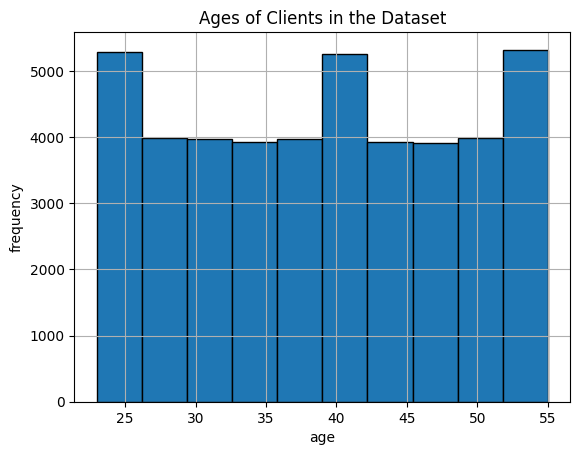

In [27]:
#Age
data.age.hist(edgecolor = 'black')
plt.title('Ages of Clients in the Dataset')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

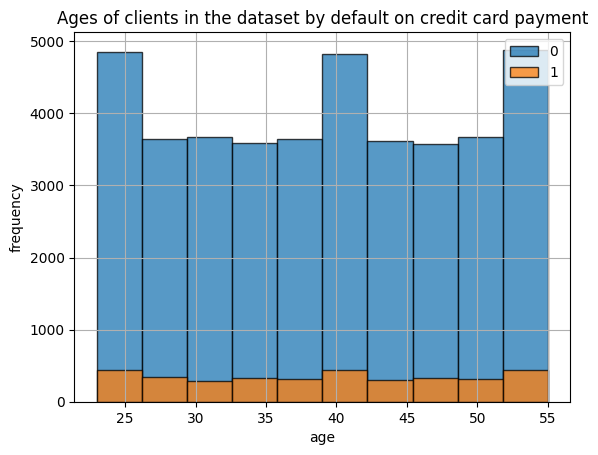

In [28]:
# Visualize ages by campaign outcome
data.groupby('y')['age'].hist(alpha = 0.75, edgecolor = 'black', legend = True)
plt.title('Ages of clients in the dataset by default on credit card payment')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

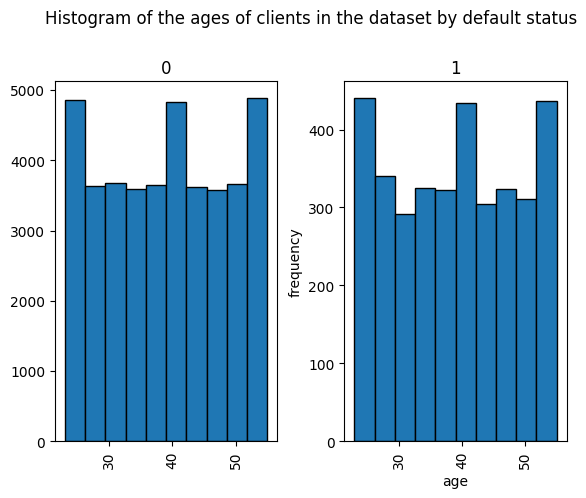

In [29]:
#Separate by campaign outcome
data['age'].hist(by = data['y'], edgecolor = 'black')
plt.suptitle('Histogram of the ages of clients in the dataset by default status', y = 1.05)
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

It is interesting to see that the overall shape of the distribution of ages is relatively similar for both groups; the difference is in the absolute numbers.



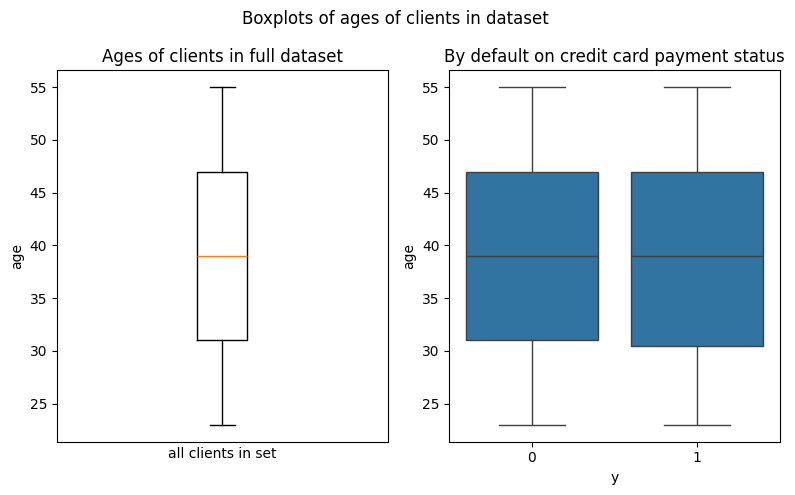


There is a total of [0] outliers in the set.


In [30]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
fig.suptitle('Boxplots of ages of clients in dataset')
#First plot: boxplot of age for full set
boxplot = axes[0].boxplot(data['age'])
axes[0].set_xlabel('all clients in set')
axes[0].set_xticks([])
axes[0].set_ylabel('age')
axes[0].set_title('Ages of clients in full dataset')
##Count outliers
outliers_count = [len(fliers.get_ydata()) for fliers in boxplot['fliers']]
#Second plot: by outcome of campaign
sns.boxplot(data = data, x = 'y', y = 'age', ax = axes[1])
axes[1].set_title('By default on credit card payment status')
plt.tight_layout()
plt.show()

print()
print(f'There is a total of {outliers_count} outliers in the set.')

These boxplots suggest that although the ages of clients in the set do not follow a bell-shaped (normal) curve, they are relatively symmetrically distributed, and the set contains no outliers.

In [34]:

#data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43509 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     43509 non-null  object 
 1   name            43509 non-null  object 
 2   age             43509 non-null  int64  
 3   gender          43509 non-null  object 
 4   car             43509 non-null  object 
 5   house           43509 non-null  object 
 6   children        43509 non-null  float64
 7   income          43509 non-null  float64
 8   days            43509 non-null  float64
 9   occupation      43509 non-null  object 
 10  family          43509 non-null  float64
 11  migrant         43509 non-null  float64
 12  payments        43509 non-null  float64
 13  credit_limit    43509 non-null  float64
 14  pct             43509 non-null  int64  
 15  credit_score    43509 non-null  float64
 16  prev_defaults   43509 non-null  int64  
 17  default6months  43509 non-null  int6


###'children' feature (number of children in client's family)

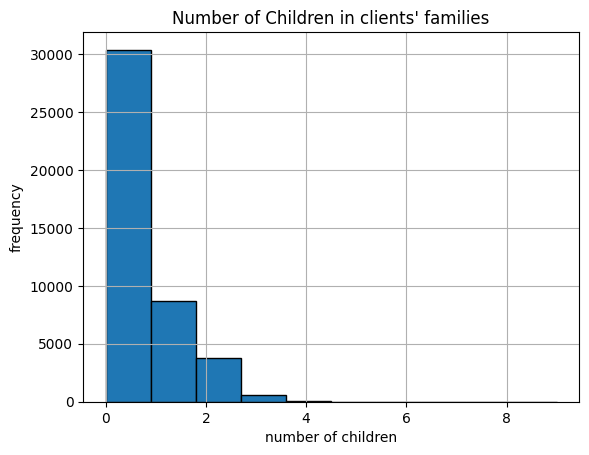

In [36]:
#children - full dataset
data.children.hist(edgecolor = 'black')
plt.title('Number of Children in clients\' families')
plt.xlabel('number of children')
plt.ylabel('frequency')
plt.show()

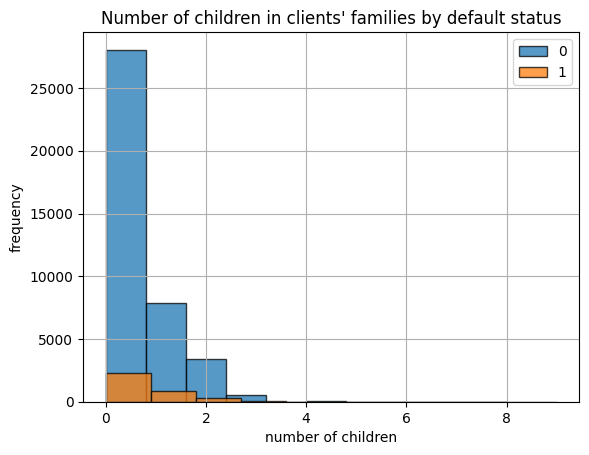

In [37]:
#By default outcome
data.groupby('y')['children'].hist(alpha = 0.75, edgecolor = 'black', legend = True)
plt.title('Number of children in clients\' families by default status')
plt.xlabel('number of children')
plt.ylabel('frequency')
plt.show()

#Basic histograms for quantitative features

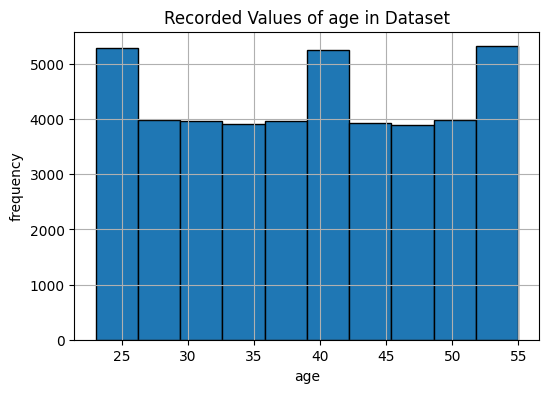

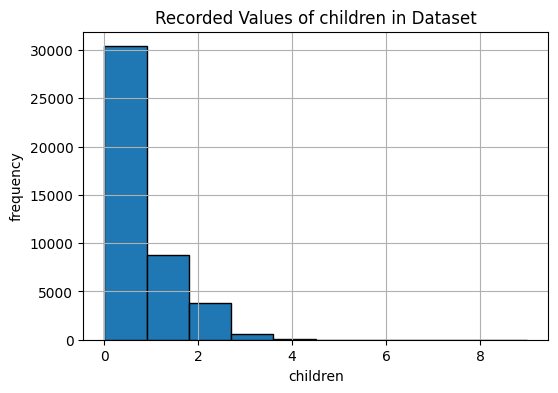

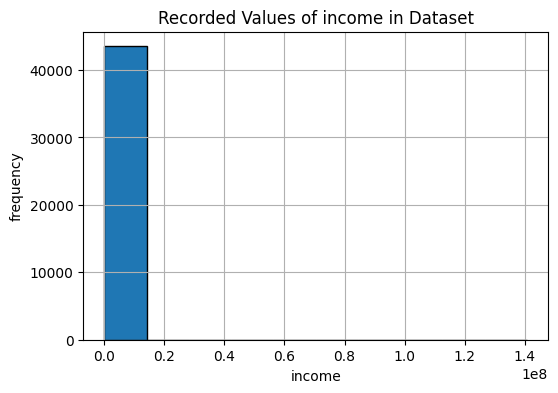

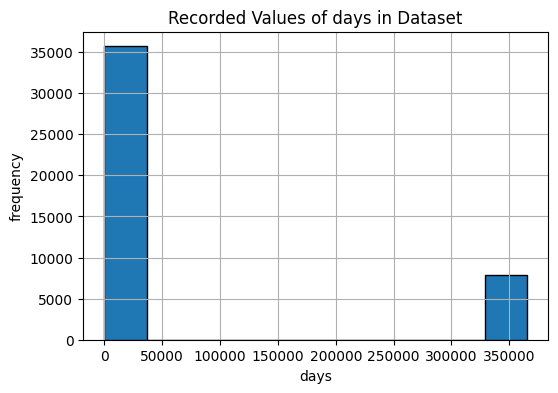

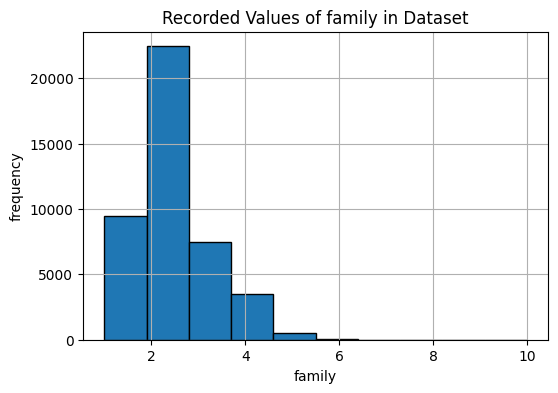

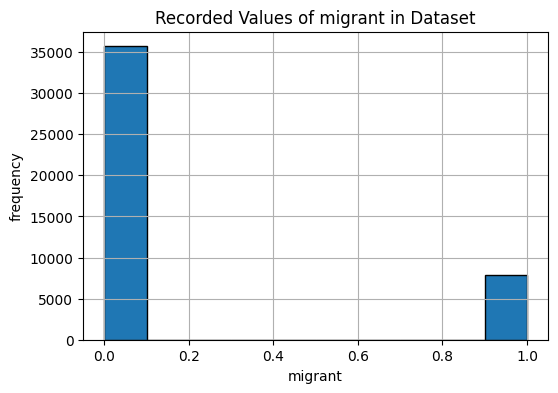

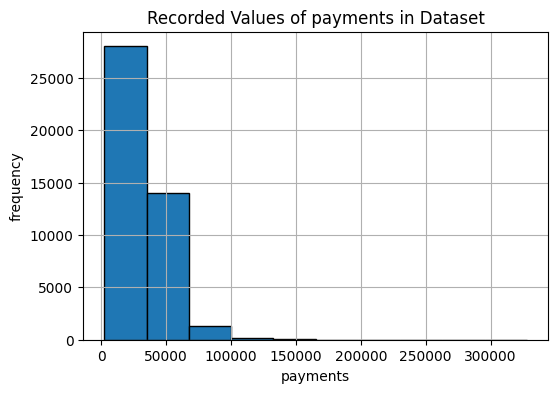

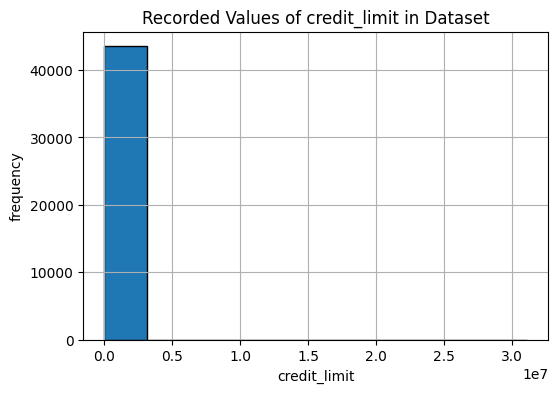

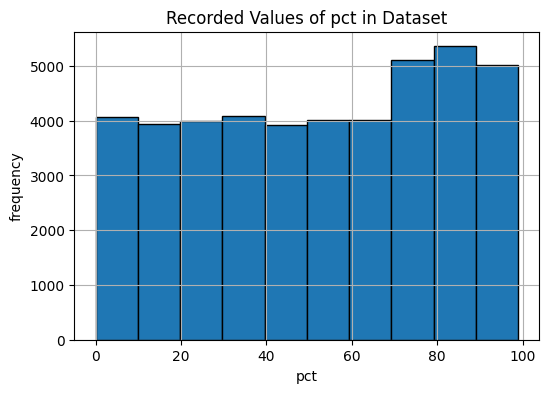

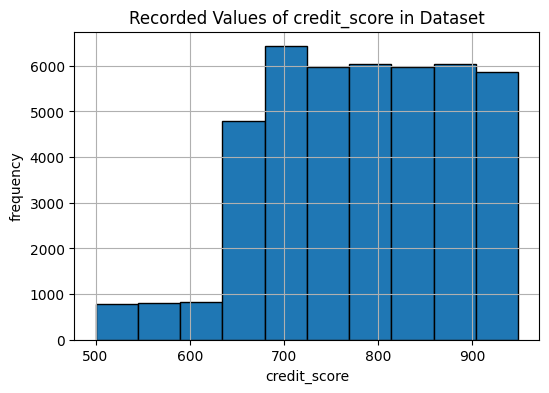

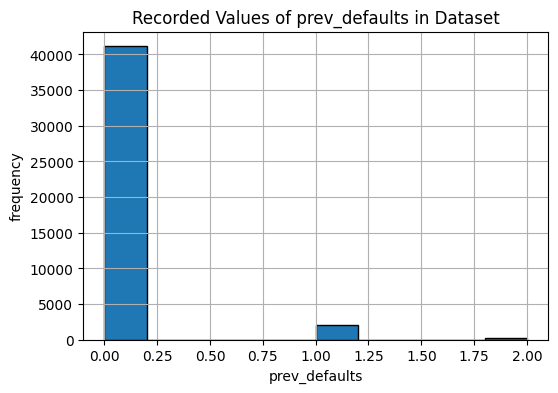

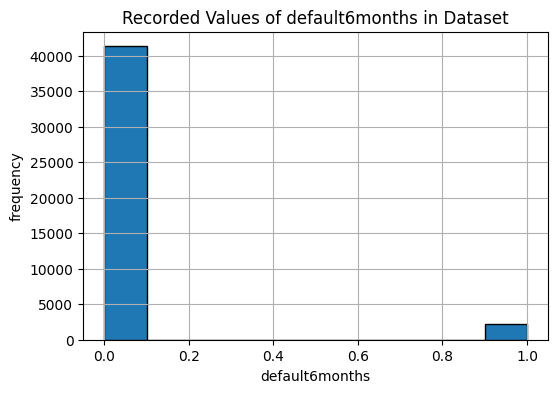

In [39]:

for column in numerical_columns:
  plt.figure(figsize = (6,4))
  X[column].hist(edgecolor = 'black')
  plt.title(f'Recorded Values of {column} in Dataset')
  plt.xlabel(column)
  plt.ylabel('frequency')
  plt.show()


A few points of interest arising from these histograms:
* the categorical variables that are already coded as numerical ('migrant' and 'default6months') simply show the breakdown between 0's (no's) and 1's (yes's);
* the features 'income' and 'credit_limit' deserve additional attention, as the corresponding histograms fail to convey their behavior, though we can intuit that they must be highly skewed right, so that the bulk of the observations end up clumped together in a single bar, and then we barely see any other bars due to the very low count;
* 'days', which represents the number of days the individual has been employed, also exhibits a peculiar histogram;
* 'children' and 'family' show right skewness, as a higher proportion of clients (and people in general) tend to have smaller families


In [54]:
from scipy.stats import skew
print(X[numerical_columns].skew())

age                 0.003583
children            1.827977
income            199.438199
days                1.667149
family              0.923653
migrant             1.669080
payments            1.732237
credit_limit      196.357678
pct                -0.129226
credit_score       -0.302082
prev_defaults       4.668515
default6months      4.093871
dtype: float64


Clearly, the two features with the most serious skewness are 'income' and credit_limit' (which, one would think, may be highly correlated). We will explore them further.

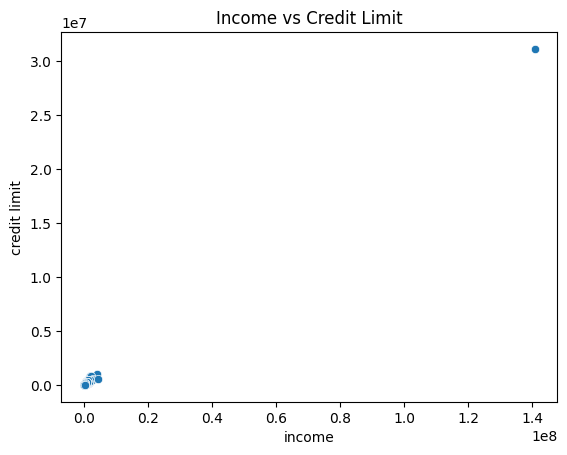

In [40]:
#Explore income vs credit_limit

sns.scatterplot(data = data, x = 'income', y = 'credit_limit')
plt.title('Income vs Credit Limit')
plt.xlabel('income')
plt.ylabel('credit limit')
plt.show()

This scatterplot suggests that there is at least one observation awfully far away from the rest. A plotly scatterplot may be more helpful in identifying it:

In [ ]:
import plotly.express as px

In [156]:
fig = px.scatter(data, x="income", y="credit_limit", color="y", labels = {'income':'income', 'credit_limit': 'credit limit'},
                 title = 'Income vs Credit Limit for Clients in Dataset')
fig.show()

It seems like there is a single observation that proves to be an outlier in terms of both 'income' and 'credit_limit'.

In [43]:
data['income'].describe()


count    4.350900e+04
mean     2.008968e+05
std      6.840522e+05
min      2.717061e+04
25%      1.262890e+05
50%      1.716450e+05
75%      2.407659e+05
max      1.407590e+08
Name: income, dtype: float64

In [45]:
explore_outlier = data.loc[data['income']>5000000]
explore_outlier

customer_id              name  age gender car house  children  \
26662  CST_114967  Jonathan Stempel   51      F   N     Y       1.0   

             income   days occupation  family  migrant  payments  \
26662  1.407590e+08  924.0   Laborers     3.0      0.0   32825.6   

       credit_limit  pct  credit_score  prev_defaults  default6months  y  
26662   31129970.49   82         526.0              0               1  1

In [46]:
#Eliminate row with income and credit limit so far away from the rest
data = data.drop(explore_outlier.index)

print(data.shape)

(43508, 19)


In [47]:
#Replot
fig = px.scatter(data, x="income", y="credit_limit", color="y")
fig.show()


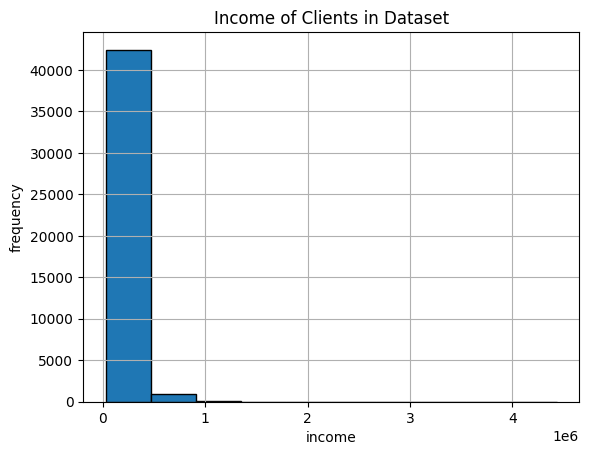

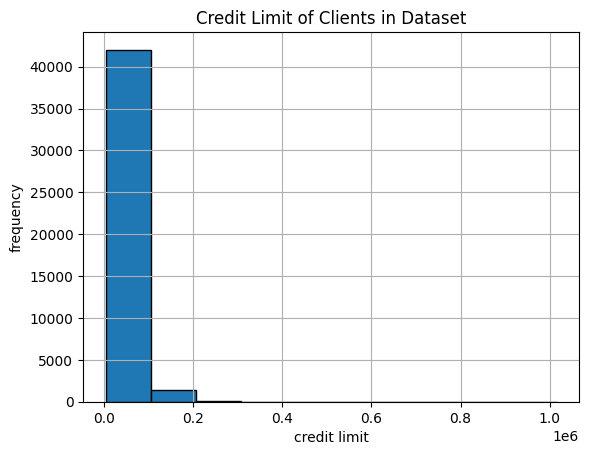

In [48]:
#Histograms for 'income' and 'credit_limit'
data.income.hist(edgecolor = 'black')
plt.title('Income of Clients in Dataset')
plt.xlabel('income')
plt.ylabel('frequency')
plt.show()

data.credit_limit.hist(edgecolor = 'black')
plt.title('Credit Limit of Clients in Dataset')
plt.xlabel('credit limit')
plt.ylabel('frequency')
plt.show()

The elimination of the outlier certainly helped. Now we can explore whether a  transformation will help reduce the skewness/normalize the values.


In [50]:
#log transformation for income and credit_limit
data['logincome'] = np.log(data['income'])
data['logcredit_limit'] = np.log(data['credit_limit'])

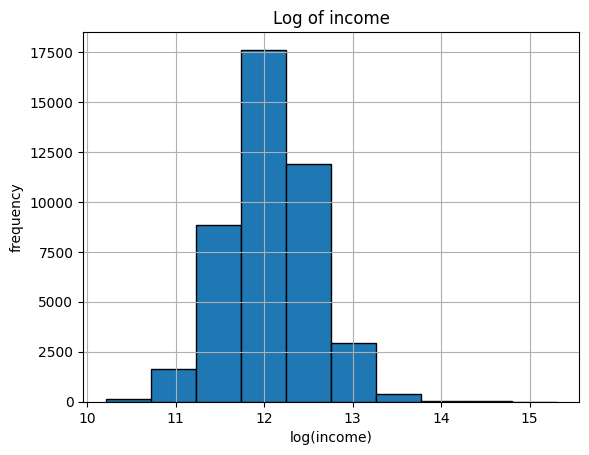

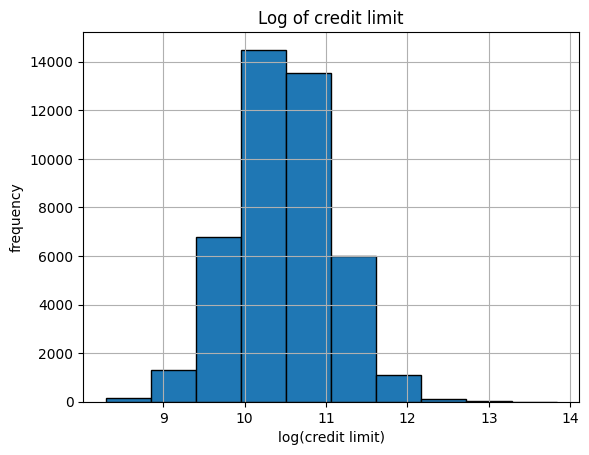

In [53]:
#Histograms

data.logincome.hist(edgecolor = 'black')
plt.title('Log of income')
plt.xlabel('log(income)')
plt.ylabel('frequency')
plt.show()

data.logcredit_limit.hist(edgecolor = 'black')
plt.title('Log of credit limit')
plt.xlabel('log(credit limit)')
plt.ylabel('frequency')
plt.show()

In [55]:
#Drop original 'income' and 'credit_limit'; keep log transformations
data.drop(['income', 'credit_limit'], axis = 1, inplace = True)


<class 'pandas.core.frame.DataFrame'>
Index: 43508 entries, 0 to 45527
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      43508 non-null  object 
 1   name             43508 non-null  object 
 2   age              43508 non-null  int64  
 3   gender           43508 non-null  object 
 4   car              43508 non-null  object 
 5   house            43508 non-null  object 
 6   children         43508 non-null  float64
 7   days             43508 non-null  float64
 8   occupation       43508 non-null  object 
 9   family           43508 non-null  float64
 10  migrant          43508 non-null  float64
 11  payments         43508 non-null  float64
 12  pct              43508 non-null  int64  
 13  credit_score     43508 non-null  float64
 14  prev_defaults    43508 non-null  int64  
 15  default6months   43508 non-null  int64  
 16  y                43508 non-null  int64  
 17  logchildren      

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43508 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      43508 non-null  object 
 1   name             43508 non-null  object 
 2   age              43508 non-null  int64  
 3   gender           43508 non-null  object 
 4   car              43508 non-null  object 
 5   house            43508 non-null  object 
 6   children         43508 non-null  float64
 7   days             43508 non-null  float64
 8   occupation       43508 non-null  object 
 9   family           43508 non-null  float64
 10  migrant          43508 non-null  float64
 11  payments         43508 non-null  float64
 12  pct              43508 non-null  int64  
 13  credit_score     43508 non-null  float64
 14  prev_defaults    43508 non-null  int64  
 15  default6months   43508 non-null  int64  
 16  y                43508 non-null  int64  
 17  logincome        

In [61]:
#Drop customer_id and name as identifiers
data = data.drop(['customer_id', 'name'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43508 entries, 0 to 45527
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              43508 non-null  int64  
 1   gender           43508 non-null  object 
 2   car              43508 non-null  object 
 3   house            43508 non-null  object 
 4   children         43508 non-null  float64
 5   days             43508 non-null  float64
 6   occupation       43508 non-null  object 
 7   family           43508 non-null  float64
 8   migrant          43508 non-null  float64
 9   payments         43508 non-null  float64
 10  pct              43508 non-null  int64  
 11  credit_score     43508 non-null  float64
 12  prev_defaults    43508 non-null  int64  
 13  default6months   43508 non-null  int64  
 14  y                43508 non-null  int64  
 15  logincome        43508 non-null  float64
 16  logcredit_limit  43508 non-null  float64
dtypes: float64(8), in

Text(0.5, 1.03, 'Pairwise scatterplots for quantitative features')

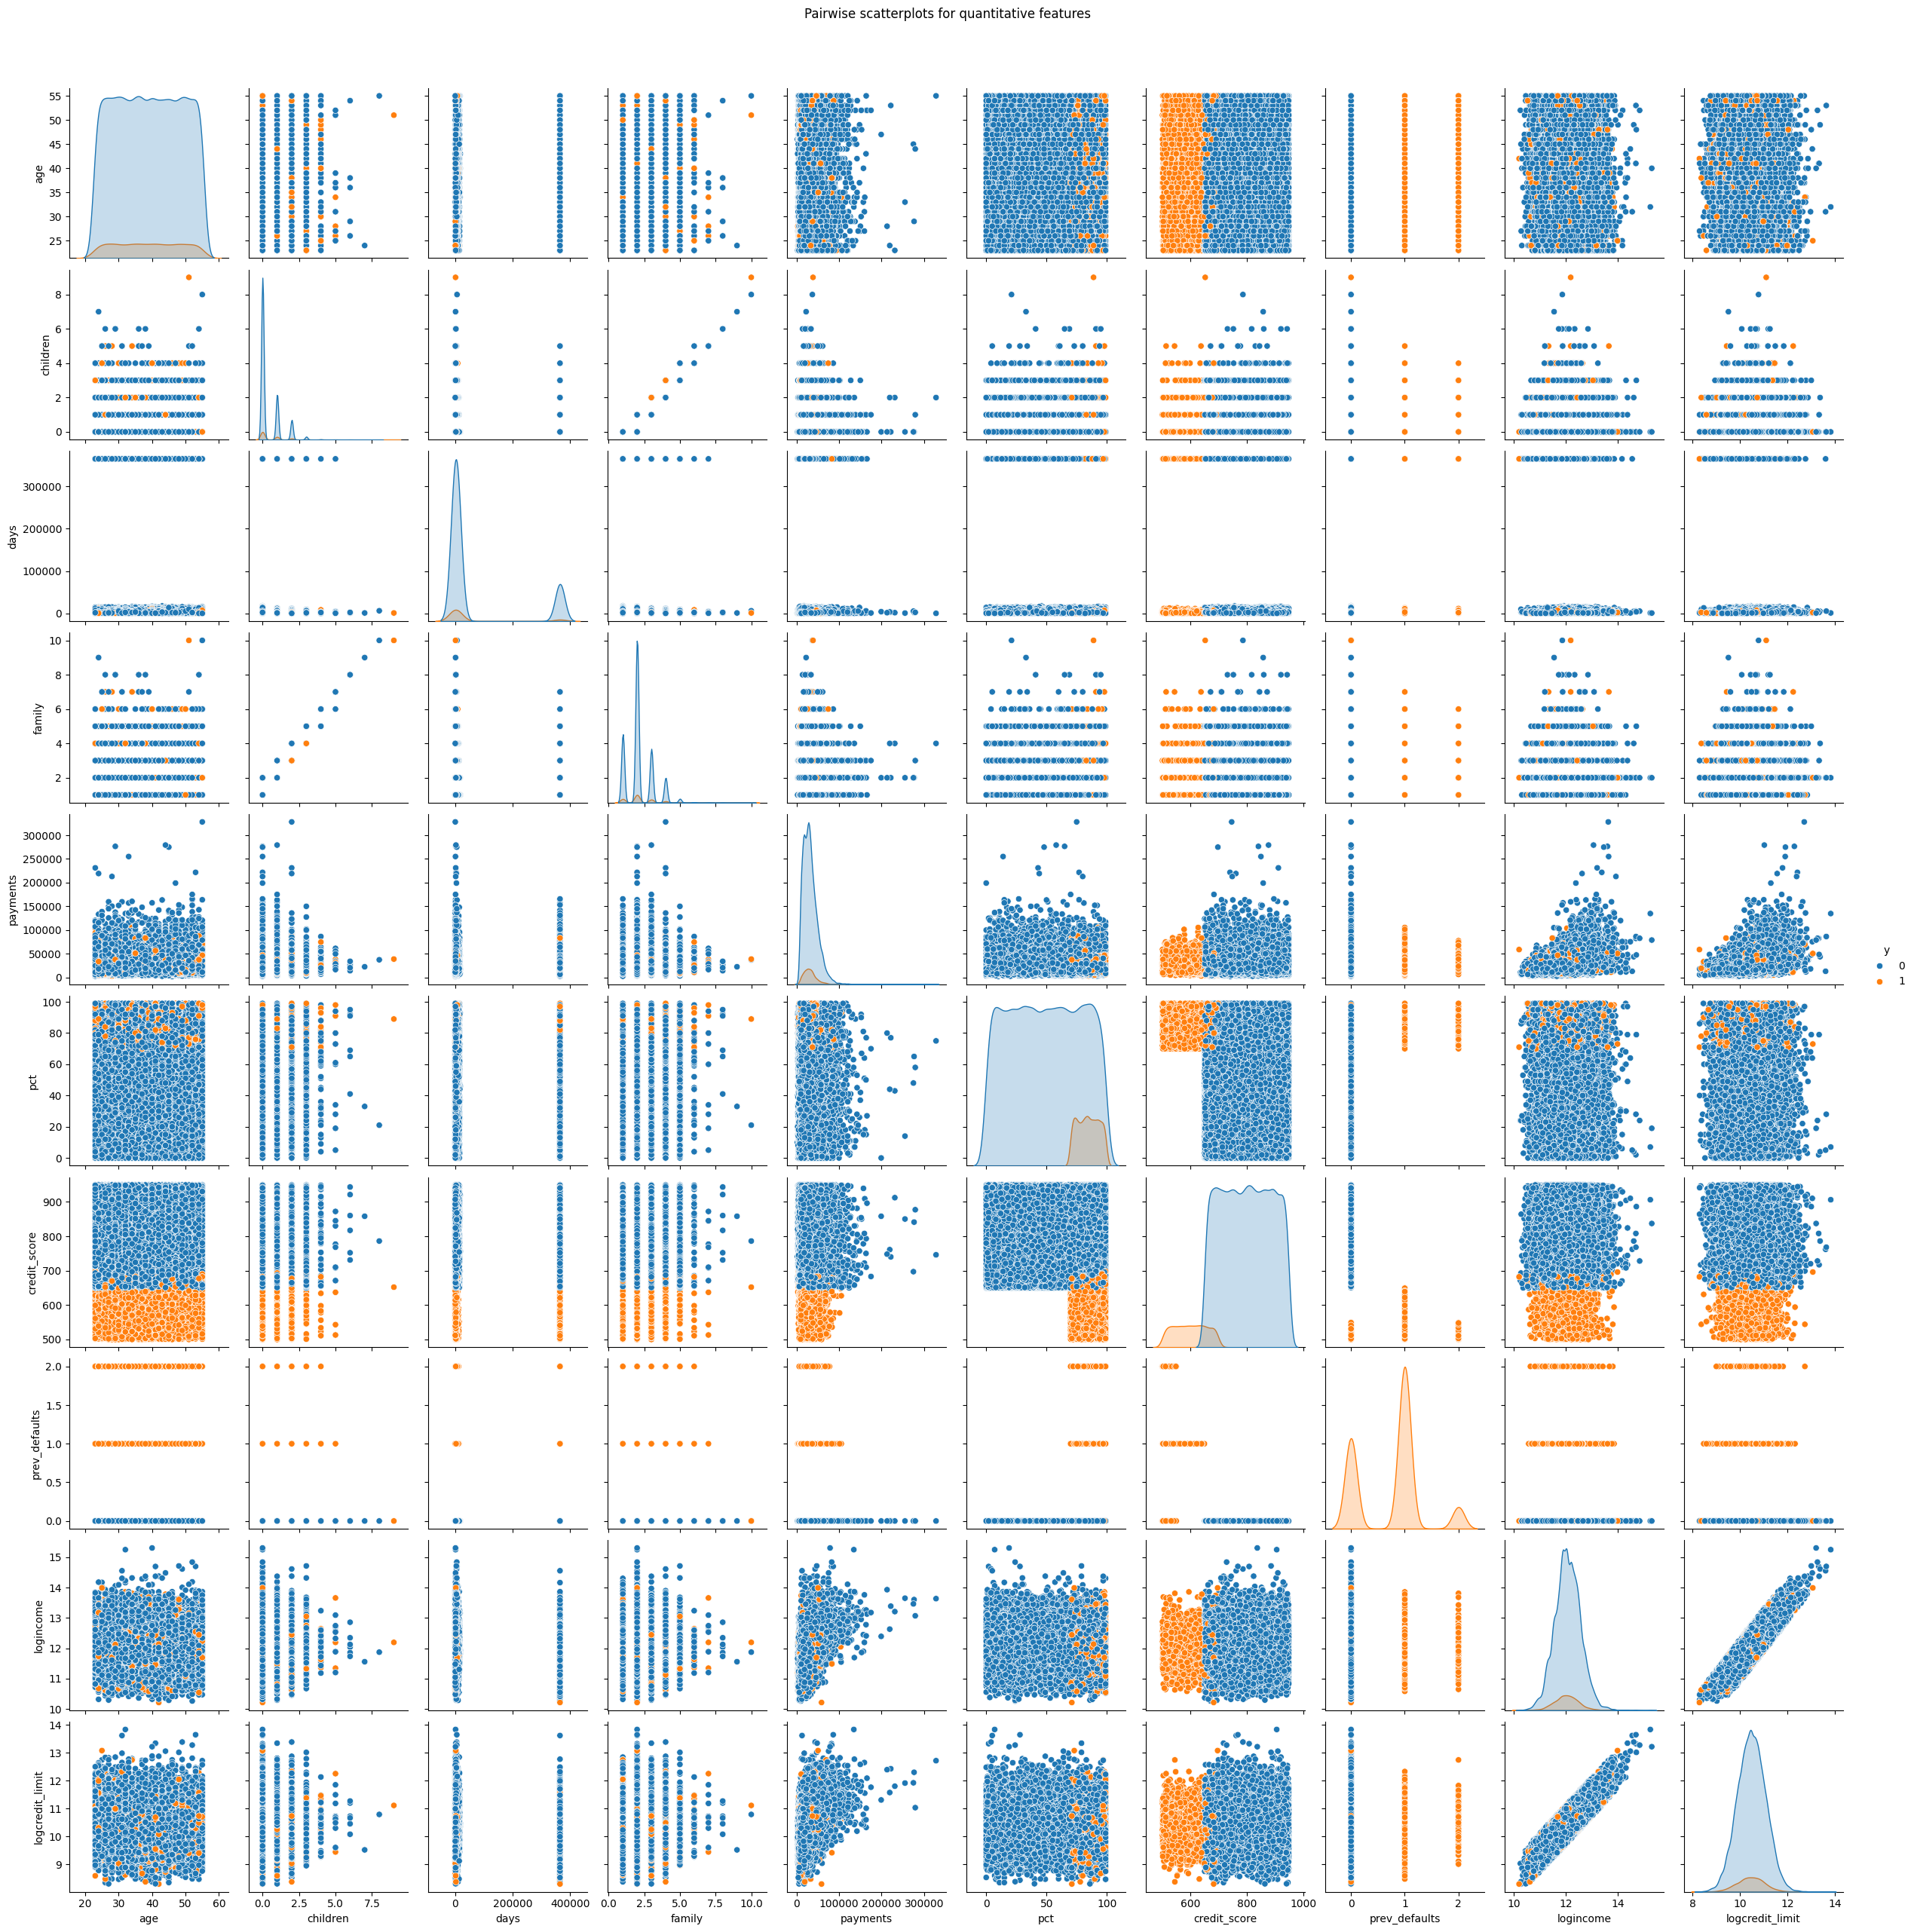

In [62]:
#exploration of the true quantitative features in the set
sns.pairplot(vars = ['age', 'children', 'days', 'family', 'payments', 'pct', 'credit_score', 'prev_defaults', 'logincome', 'logcredit_limit'], data = data, \
             hue = 'y').fig.suptitle('Pairwise scatterplots for quantitative features', y = 1.03)


####Insights that we can extract from these plots:

Variables that exhibit clear differences between clients who default on their credit card payments and those who don't:
*'pct' (percentage of credit utilization): higher for clients who default on their cc payment
*'credit_score': lower for clients who default on their cc payment
*'prev_defaults' (number of previous defaults): higher for clients who default on their cc payment

Correlation matrix:
                      age  children      days    family  payments       pct  \
age              1.000000 -0.009832  0.001941 -0.012623 -0.003280 -0.006126   
children        -0.009832  1.000000 -0.242827  0.880477  0.029664  0.008747   
days             0.001941 -0.242827  1.000000 -0.230315 -0.105372 -0.018016   
family          -0.012623  0.880477 -0.230315  1.000000  0.079735  0.003238   
payments        -0.003280  0.029664 -0.105372  0.079735  1.000000 -0.007109   
pct             -0.006126  0.008747 -0.018016  0.003238 -0.007109  1.000000   
credit_score     0.001807 -0.014838  0.036425 -0.011203  0.004626 -0.172691   
prev_defaults    0.000440  0.019921 -0.036024  0.010352 -0.012548  0.252865   
logincome       -0.008625  0.037209 -0.212476  0.039234  0.476721 -0.007943   
logcredit_limit -0.005755  0.032251 -0.170425  0.030687  0.393034 -0.004694   

                 credit_score  prev_defaults  logincome  logcredit_limit  
age                  0.001807      

<Axes: >

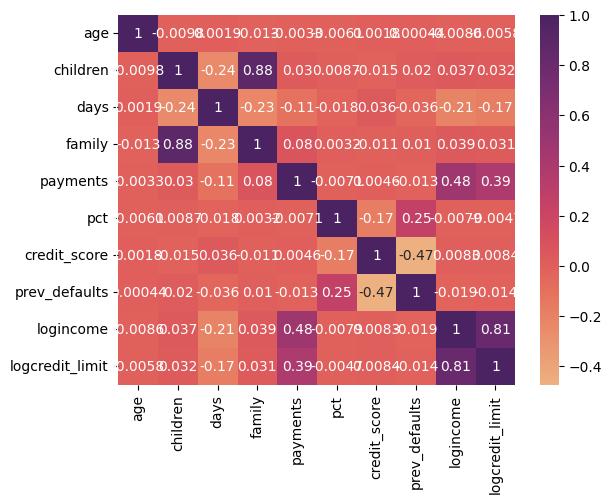

In [63]:
#Examine degree of correlation between these variables
quantitative = data[['age', 'children', 'days', 'family', 'payments', 'pct', 'credit_score', 'prev_defaults', 'logincome', 'logcredit_limit']]
corrmatrix = quantitative.corr()
print('Correlation matrix:')
print(corrmatrix)
sns.heatmap(quantitative.corr(), annot = True, cmap = 'flare')

Not surprisingly, there is a high degree of correlation between the variables 'children' and 'family', and also between 'logincome' and 'logcredit_limit'. Since highly correlated variables convey similar information, keeping all of them can be counterproductive, as the complexity of numerical algorithms increases with higher dimensionality, which could even lead to errors. I will keep 'family' and 'logincome' and drop the other two features to simplify the analysis.

In [64]:
#Drop highly correlated variables 'children' and 'logcredit_limit'

data.drop(['children', 'logcredit_limit'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43508 entries, 0 to 45527
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43508 non-null  int64  
 1   gender          43508 non-null  object 
 2   car             43508 non-null  object 
 3   house           43508 non-null  object 
 4   days            43508 non-null  float64
 5   occupation      43508 non-null  object 
 6   family          43508 non-null  float64
 7   migrant         43508 non-null  float64
 8   payments        43508 non-null  float64
 9   pct             43508 non-null  int64  
 10  credit_score    43508 non-null  float64
 11  prev_defaults   43508 non-null  int64  
 12  default6months  43508 non-null  int64  
 13  y               43508 non-null  int64  
 14  logincome       43508 non-null  float64
dtypes: float64(6), int64(5), object(4)
memory usage: 5.3+ MB


##**EDA Categorical Features**

### Gender and Occupation Type of Clients in the Dataset

Text(0.5, 1.0, 'Gender of clients in Dataset')

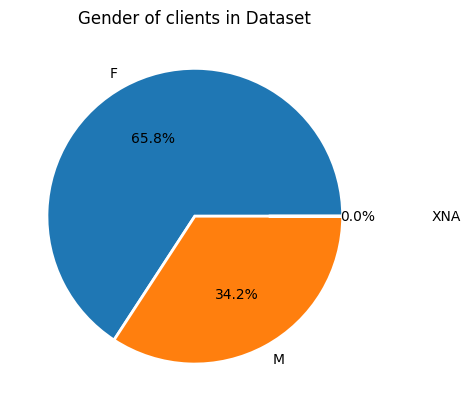

In [72]:
#Gender breakdown of clients in full set
plt.pie(x = data.gender.value_counts(), labels = data.gender.value_counts().index, autopct = '%1.1f%%',\
        wedgeprops = {'linewidth': 2.0, 'edgecolor': 'white'}, explode = (0, 0, 0.5))
plt.title('Gender of clients in Dataset')

Almost two thirds of the clients in the dataset are female.

[Text(0.5, 1.0, 'Occupation types of clients in the dataset')]

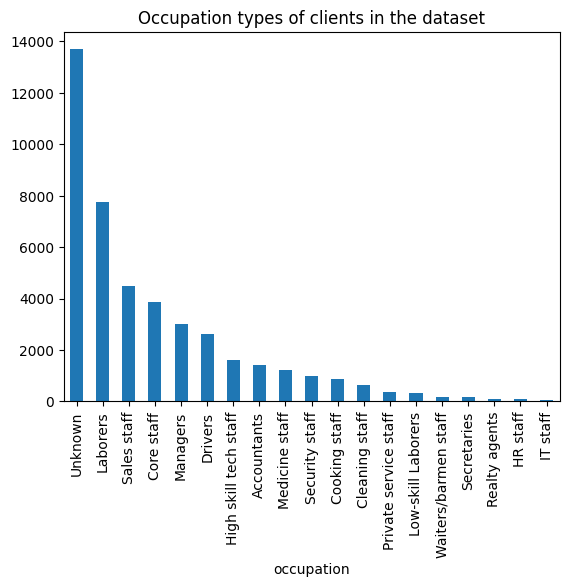

In [73]:
#Job types - full dataset
data.occupation.value_counts().plot.bar().set(title = 'Occupation types of clients in the dataset')

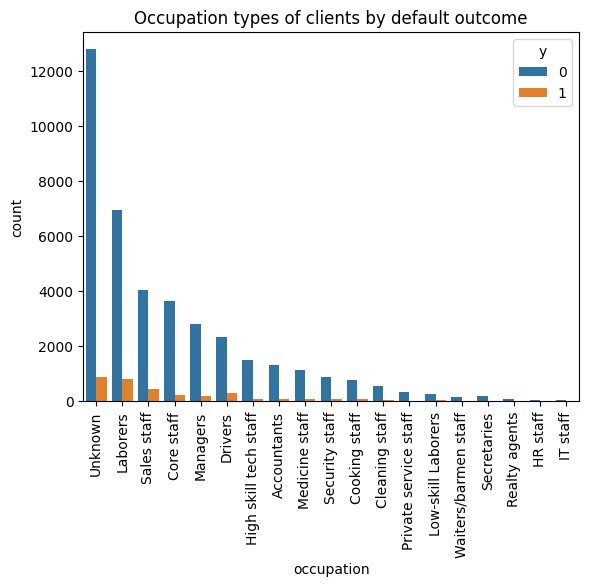

In [74]:
#By default outcome
sns.countplot(data = data, x = 'occupation', order = data['occupation'].value_counts().index, hue = 'y').set(title = 'Occupation types of clients by default outcome')
plt.xticks(rotation = 90)
plt.show()

In [78]:
#Overall occupations distribution
print(data['occupation'].value_counts(ascending = False)/len(data['occupation']))

occupation
Unknown                  0.314333
Laborers                 0.178128
Sales staff              0.103452
Core staff               0.089064
Managers                 0.069619
Drivers                  0.060610
High skill tech staff    0.036706
Accountants              0.032454
Medicine staff           0.028202
Security staff           0.022823
Cooking staff            0.019766
Cleaning staff           0.014572
Private service staff    0.008619
Low-skill Laborers       0.007470
Waiters/barmen staff     0.004413
Secretaries              0.004390
Realty agents            0.002161
HR staff                 0.001770
IT staff                 0.001448
Name: count, dtype: float64


In [77]:
#Breakdown of occupations categories by default outcome
print(pd.crosstab(data.occupation, data.y, normalize = 'index').sort_values(1, ascending = False))

y                             0         1
occupation                               
Low-skill Laborers     0.846154  0.153846
Drivers                0.882821  0.117179
Cooking staff          0.887209  0.112791
Waiters/barmen staff   0.890625  0.109375
Security staff         0.895267  0.104733
Cleaning staff         0.895899  0.104101
Laborers               0.896000  0.104000
Sales staff            0.902910  0.097090
Realty agents          0.904255  0.095745
HR staff               0.909091  0.090909
Medicine staff         0.922575  0.077425
Private service staff  0.930667  0.069333
Managers               0.932981  0.067019
Unknown                0.935434  0.064566
High skill tech staff  0.936756  0.063244
Core staff             0.940903  0.059097
Accountants            0.945467  0.054533
Secretaries            0.958115  0.041885
IT staff               0.968254  0.031746


The tables above show the varying default rates by occupation type: we see that the highest (relative) default rate corresponds to low-skill laborers, followed by drivers and cooking/waiting/security/cleaning staff and laborers, all above 10% of such clients in the dataset.
The lowest default rate corresponds to IT staff, secretaries and accountants.

###Migrant status of clients in dataset

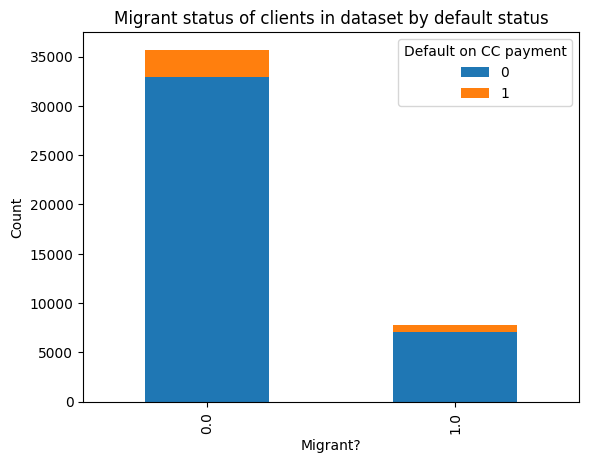

In [86]:
counts = data.groupby(['migrant', 'y']).size().unstack(fill_value=0)

# Plotting
counts.plot(kind='bar', stacked=True)
plt.xlabel('Migrant?')
plt.ylabel('Count')
plt.title('Migrant status of clients in dataset by default status')
plt.legend(title='Default on CC payment')
plt.show()

In [87]:
# Tabular display of migrant status
contingency_table = pd.crosstab(data['migrant'], data['y'], normalize = 'index')
print(contingency_table)


y               0         1
migrant                    
0.0      0.923344  0.076656
1.0      0.898414  0.101586


###Car and home ownership

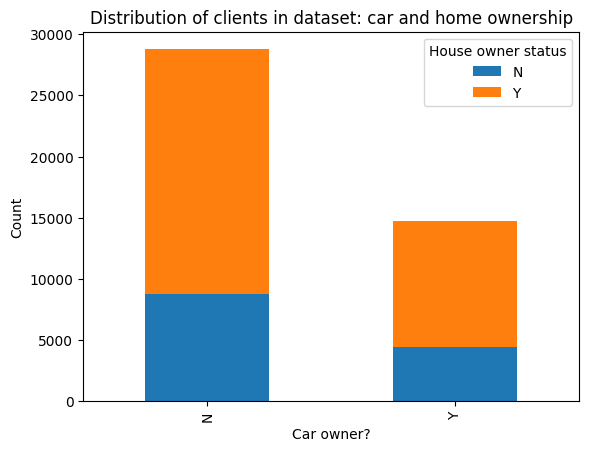

In [97]:
counts = data.groupby(['car', 'house']).size().unstack(fill_value=0)

# Plotting
counts.plot(kind='bar', stacked=True)
plt.xlabel('Car owner?')
plt.ylabel('Count')
plt.title('Distribution of clients in dataset: car and home ownership')
plt.legend(title='House owner status')
plt.show()



In [90]:
print(pd.crosstab(data['car'], data['house'], margins = True))

house      N      Y    All
car                       
N       8807  19950  28757
Y       4447  10304  14751
All    13254  30254  43508


Text(0.5, 0.98, "Default status of clients in the dataset by 'Ownership' Factors")

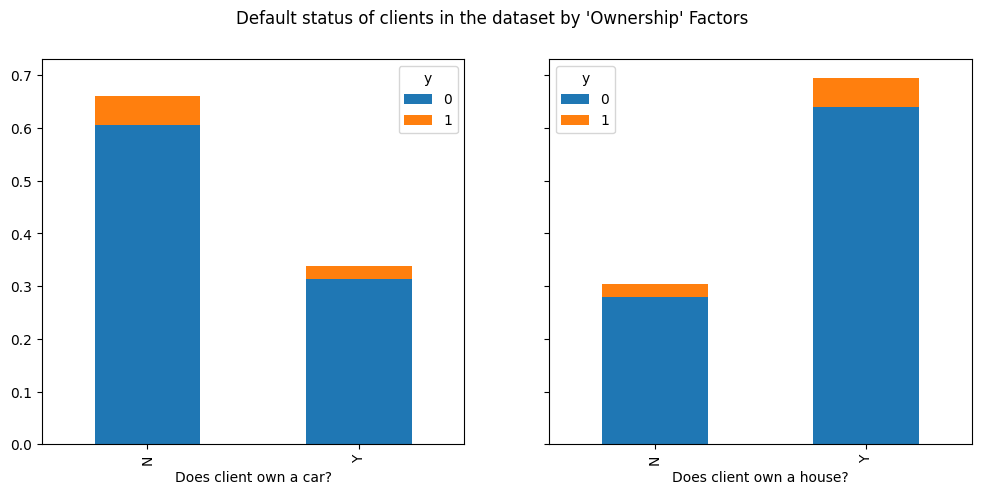

In [92]:
ctcar = pd.crosstab(data.car, data.y, normalize = 'all')
cthouse = pd.crosstab(data.house, data.y, normalize = 'all')


fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5), sharey = True)

ctcar.plot(kind = 'bar', stacked = True, ax = axes[0], xlabel = 'Does client own a car?')
cthouse.plot(kind = 'bar', stacked = True, ax = axes[1], xlabel = 'Does client own a house?')

fig.suptitle('Default status of clients in the dataset by \'Ownership\' Factors')

In [96]:
print(ctcar)
print()
print(cthouse)

y           0         1
car                    
N    0.604992  0.055967
Y    0.313873  0.025168

y             0         1
house                    
N      0.279466  0.025168
Y      0.639400  0.055967


###Existence of defaults in the last 6 months


In [101]:
data.default6months.value_counts()

default6months
0    41301
1     2207
Name: count, dtype: int64

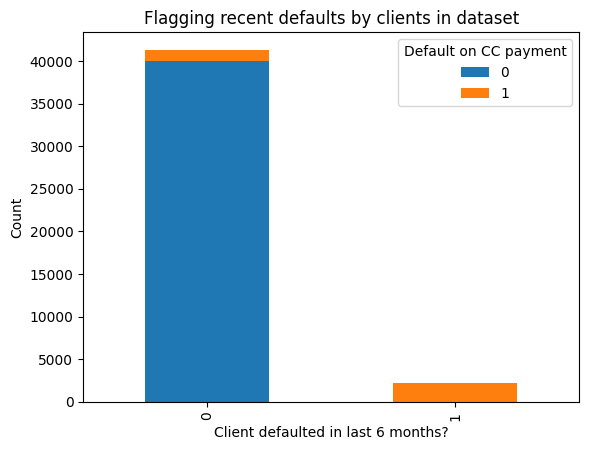

In [104]:
counts = data.groupby(['default6months', 'y']).size().unstack(fill_value=0)

# Plotting
counts.plot(kind='bar', stacked=True)
plt.xlabel('Client defaulted in last 6 months?')
plt.ylabel('Count')
plt.title('Flagging recent defaults by clients in dataset')
plt.legend(title='Default on CC payment')
plt.show()

Not surprisingly, clients who defaulted in the last six months invariably correspond to y = 1 (default on credit card payment).

In [102]:
print(pd.crosstab(data.default6months, data.y, margins = True))

y                   0     1    All
default6months                    
0               39978  1323  41301
1                   0  2207   2207
All             39978  3530  43508


## Business Objective

The objective of this project is to build a set of different classifiers to predict the outcome of target variable (y = 1, meaning that the client will default on their credit card payment,or y = 0, if they do not default), based on the information contained in the features contained  in the dataset. Once the classifiers are built, the goal is to compare them and make a determination as to which one performs best and make sense of the result.

In [103]:
#The dataset has been slightly modified after transforming some variables and eliminating others
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43508 entries, 0 to 45527
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43508 non-null  int64  
 1   gender          43508 non-null  object 
 2   car             43508 non-null  object 
 3   house           43508 non-null  object 
 4   days            43508 non-null  float64
 5   occupation      43508 non-null  object 
 6   family          43508 non-null  float64
 7   migrant         43508 non-null  float64
 8   payments        43508 non-null  float64
 9   pct             43508 non-null  int64  
 10  credit_score    43508 non-null  float64
 11  prev_defaults   43508 non-null  int64  
 12  default6months  43508 non-null  int64  
 13  y               43508 non-null  int64  
 14  logincome       43508 non-null  float64
dtypes: float64(6), int64(5), object(4)
memory usage: 5.3+ MB


##Engineering Features



In [105]:
# Define features X and target y
y = data['y']
X = data.drop('y', axis = 1)

In [106]:
y.shape, X.shape

((43508,), (43508, 14))

As mentioned earlier, a few of the categorical features are already coded as numbers. This applies to the target variable 'y', as well as 'migrant' and 'default6months'. The remaining categorical features ('gender', 'car', 'house', and 'occupation') will still need to be encoded using OneHotEncoding. For now, since we will use pipelines for categorical and quantitative variables, those "pre-coded" columns will be forced as object type so that they are not piped through the quantitative standard scaler (which does not make sense for 0/1 variables).

In [107]:
# Define the conversion dictionary
convert_dict = {'migrant': object, 'default6months': object}

# Convert columns using the dictionary
X = X.astype(convert_dict)
print(X.dtypes)

age                 int64
gender             object
car                object
house              object
days              float64
occupation         object
family            float64
migrant            object
payments          float64
pct                 int64
credit_score      float64
prev_defaults       int64
default6months     object
logincome         float64
dtype: object


In [108]:
#Identify the data-type columns for the corresponding pipelines

categorical_columns = X.select_dtypes(include = ['object']).columns.tolist()
numerical_columns = X.select_dtypes(exclude = ['object']).columns.tolist()

####Creating pipeline for preprocessing both categorical and quantitative features

In [109]:
#Define feature preprocessors for use after train/test split
#will not drop the first label in OneHot so all labels are visible
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder( sparse_output = False, handle_unknown = 'error'), categorical_columns)
    ]
)


##Splitting the set into subsets for training and testing



In [110]:
# Split the features of the dataset into training and test sets

#Use 80% of data to train the model:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #fix random_state for reproducibility

In [111]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((34806, 14), (34806,), (8702, 14), (8702,))

In [112]:
#Now we can process the training and testing sets separately through the numerical and categorical preprocessors
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [113]:
X_train.shape, X_test.shape

((34806, 38), (8702, 38))

In [114]:
onehot_encoder = preprocessor.named_transformers_['cat']
print(onehot_encoder.get_feature_names_out(categorical_columns))

['gender_F' 'gender_M' 'gender_XNA' 'car_N' 'car_Y' 'house_N' 'house_Y'
 'occupation_Accountants' 'occupation_Cleaning staff'
 'occupation_Cooking staff' 'occupation_Core staff' 'occupation_Drivers'
 'occupation_HR staff' 'occupation_High skill tech staff'
 'occupation_IT staff' 'occupation_Laborers'
 'occupation_Low-skill Laborers' 'occupation_Managers'
 'occupation_Medicine staff' 'occupation_Private service staff'
 'occupation_Realty agents' 'occupation_Sales staff'
 'occupation_Secretaries' 'occupation_Security staff' 'occupation_Unknown'
 'occupation_Waiters/barmen staff' 'migrant_0.0' 'migrant_1.0'
 'default6months_0' 'default6months_1']


##Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

There are a couple of options to use as baseline model for a classifier: a random classifier, which assigns predictions based on the observed breakdown in the response variable in the dataset, and what is known as a ZeroR (or Zero Rule) classifier, which does not produce random predictions, but instead makes every prediction match the majority class observed in the response variable in the dataset. These are both variations of a so-called Dummy Classifier. In addition to these two general rules, a baseline (dummy) classifier can also assign class labels randomly and uniformly regardless of the distribution of classes in the training data; or, finally, the classifier can predict always a constant class label specified by a constant parameter.



In [125]:
#initialize results matrix
results_simplemodels = []

Time taken (seconds):  0.0037953853607177734
Accuracy for Baseline Classifier (majority class):  0.9143874971270972

Classification Report for Baseline Dummy Classifier: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      7957
           1       0.00      0.00      0.00       745

    accuracy                           0.91      8702
   macro avg       0.46      0.50      0.48      8702
weighted avg       0.84      0.91      0.87      8702



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



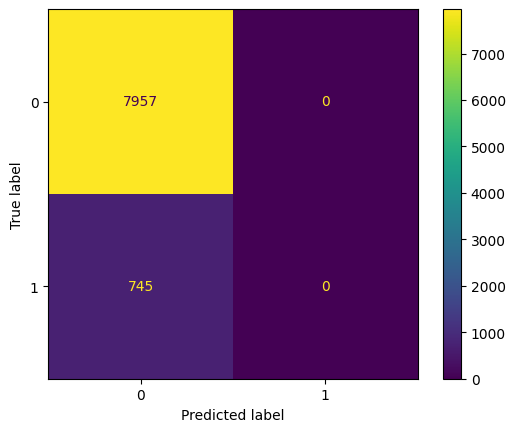

In [126]:
#Create a baseline dummy classifier
#Data has already been split into X_train, X_test, y_train, y_test,
# and the X features have been transformed (OneHot for categorical, MinMax for numerical)

dummy_classifier = DummyClassifier(strategy = 'most_frequent')
#other options are 'stratified'/'prior'/'stratified'/'uniform'/'constant'

#Start timer
start_time = time.time()

#Fit this baseline classifier on the training data
dummy_classifier.fit(X_train, y_train)

#Compute predictions on the test data
y_pred = dummy_classifier.predict(X_test)

end_time = time.time()

#Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label = 1)
recall = recall_score(y_test, y_pred, pos_label = 1)
f1 = f1_score(y_test, y_pred, pos_label = 1)
conf_matrix = confusion_matrix(y_test, y_pred, labels = dummy_classifier.classes_)
report = classification_report(y_test, y_pred)

#Append line of results
results_simplemodels.append(["Dummy Classifier", accuracy, precision, recall, f1, end_time-start_time])

disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = dummy_classifier.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for Baseline Classifier (majority class): ", accuracy)
print("\nClassification Report for Baseline Dummy Classifier: ")
print(report)
disp.plot()
plt.show()

## Simple Logistic Regression Model

Time taken (seconds):  0.11150026321411133
Accuracy for Logistic Regression:  0.9775913583084348
Intercept:  [-2.13718674] ; coefficients:  [[ 0.02702081 -0.17462328 -0.06883889  0.01687746  2.1153927  -4.33793933
   1.28353986 -0.00759422 -1.13517121 -0.66059583 -0.00672948 -0.78993072
  -1.0125658  -0.88491191 -0.91758461 -0.26916431 -0.32912953  0.71848742
  -0.08921104  0.08301575 -0.03561862 -0.72877451 -0.10181273  0.14270236
  -0.04040051 -0.40992874 -0.09218704 -0.88889097  0.01080731  0.18743633
  -0.24412876  0.14962292 -0.32073219  0.45541033 -0.98267969 -0.81981683
  -2.26418813  0.46169161]]

Classification Report for basic Logistic Regression Classifier: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7957
           1       0.96      0.77      0.85       745

    accuracy                           0.98      8702
   macro avg       0.97      0.88      0.92      8702
weighted avg       0.98      0.98      0.98      8

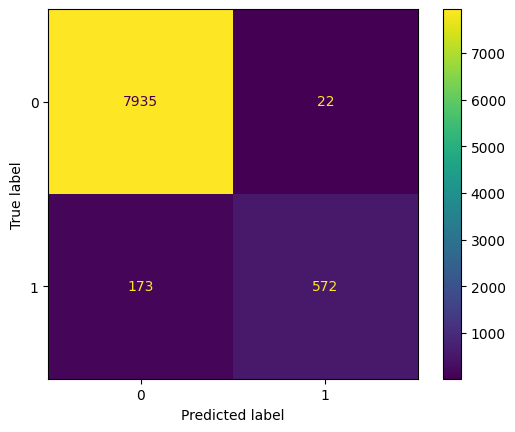

In [127]:
lr_classifier = LogisticRegression()

start_time = time.time()

lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
end_time = time.time()

#Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, pos_label = 1)
recall = recall_score(y_test, y_pred_lr, pos_label = 1)
f1 = f1_score(y_test, y_pred_lr, pos_label = 1)
conf_matrix = confusion_matrix(y_test, y_pred_lr, labels = lr_classifier.classes_)
report = classification_report(y_test, y_pred_lr)

#Append line of results
results_simplemodels.append(["Logistic Regression", accuracy, precision, recall, f1, end_time-start_time])



disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = lr_classifier.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for Logistic Regression: ", accuracy)
print("Intercept: ", lr_classifier.intercept_, "; coefficients: ", lr_classifier.coef_)
print("\nClassification Report for basic Logistic Regression Classifier: ")
print(report)
disp.plot()
plt.show()

## Comparing Basic Logistic Regression to other classifiers


##k Nearest Neighbors (KNN)

Time taken (seconds):  2.362189531326294
Accuracy for KNN (k = 5):  0.9739140427487933

Classification Report for KNN Classifier (k = 7): 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7957
           1       0.95      0.73      0.83       745

    accuracy                           0.97      8702
   macro avg       0.96      0.86      0.91      8702
weighted avg       0.97      0.97      0.97      8702



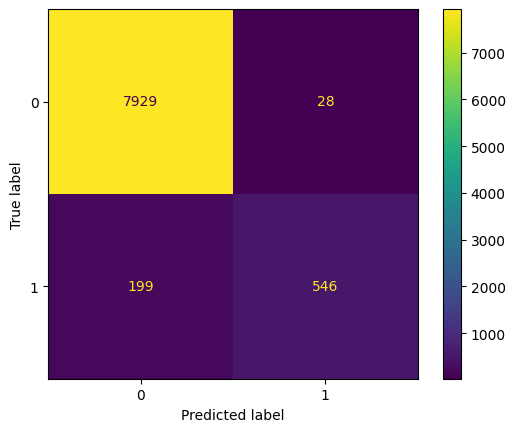

In [128]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5) #values around 3, 5 or 7 tend to work well (depends on data, of course)
#Will determine optimal k value when doing GridSearchCV

start_time = time.time()

knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
end_time = time.time()

#Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, pos_label = 1)
recall = recall_score(y_test, y_pred_knn, pos_label = 1)
f1 = f1_score(y_test, y_pred_knn, pos_label = 1)
conf_matrix = confusion_matrix(y_test, y_pred_knn, labels = knn_classifier.classes_)
report = classification_report(y_test, y_pred_knn)

#Append line of results
results_simplemodels.append(["KNN", accuracy, precision, recall, f1, end_time-start_time])



disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = knn_classifier.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for KNN (k = 5): ", accuracy)
print("\nClassification Report for KNN Classifier (k = 7): ")
print(report)
disp.plot()
plt.show()


## Decision Tree

Time taken (seconds):  0.1425034999847412
Accuracy for Decision Tree:  0.9785106871983452

Classification Report for Decision Tree: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7957
           1       1.00      0.75      0.86       745

    accuracy                           0.98      8702
   macro avg       0.99      0.87      0.92      8702
weighted avg       0.98      0.98      0.98      8702



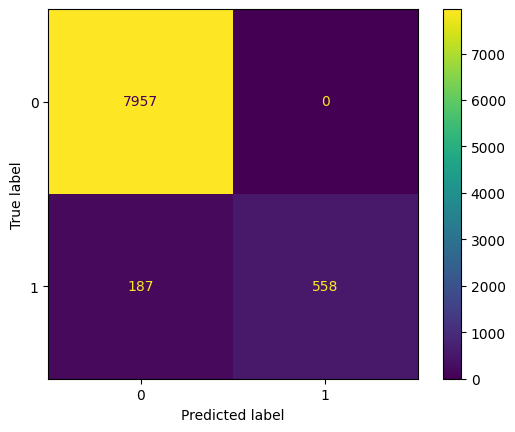

In [129]:
tree_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 42)
start_time = time.time()

dtree = tree_classifier.fit(X_train, y_train)
y_pred_tree = tree_classifier.predict(X_test)

end_time = time.time()


#Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree, pos_label = 1)
recall = recall_score(y_test, y_pred_tree, pos_label = 1)
f1 = f1_score(y_test, y_pred_tree, pos_label = 1)
conf_matrix = confusion_matrix(y_test, y_pred_tree, labels = tree_classifier.classes_)
report = classification_report(y_test, y_pred_tree)

#Append line of results
results_simplemodels.append(["Decision Tree", accuracy, precision, recall, f1, end_time-start_time])



disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = tree_classifier.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for Decision Tree: ", accuracy)
print("\nClassification Report for Decision Tree: ")
print(report)
disp.plot()
plt.show()


[Text(0.4, 0.875, 'x[5] <= -1.328\nentropy = 0.402\nsamples = 34806\nvalue = [32021, 2785]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 2124\nvalue = [0, 2124]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[5] <= -0.83\nentropy = 0.143\nsamples = 32682\nvalue = [32021, 661]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[4] <= 0.585\nentropy = 0.497\nsamples = 6063\nvalue = [5402, 661]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 3755\nvalue = [3755, 0]'),
 Text(0.6, 0.125, 'entropy = 0.864\nsamples = 2308\nvalue = [1647.0, 661.0]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 26619\nvalue = [26619, 0]')]

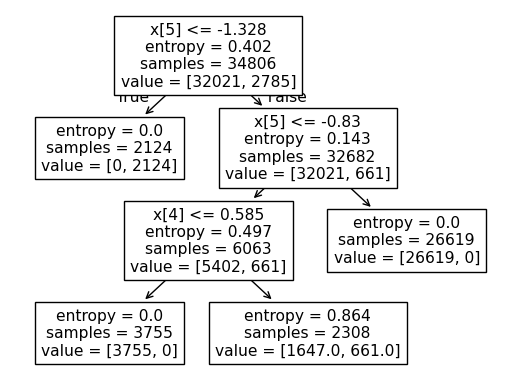

In [130]:
#DT diagram
tree.plot_tree(dtree)

##Support Vector Machine (SVC)

Time taken (seconds):  7.959030628204346
Accuracy for SVC:  0.9785106871983452

Classification Report for SVC: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7957
           1       1.00      0.75      0.86       745

    accuracy                           0.98      8702
   macro avg       0.99      0.87      0.92      8702
weighted avg       0.98      0.98      0.98      8702



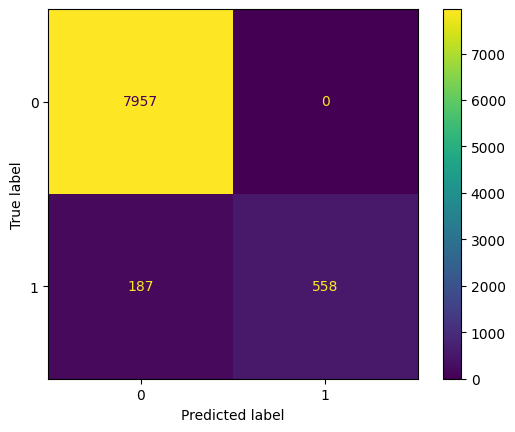

In [131]:
SVC_classifier = SVC(kernel = 'linear') #will explore type of kernel when doing GridSearchCV
start_time = time.time()

SVC_classifier.fit(X_train, y_train)
y_pred_SVC = SVC_classifier.predict(X_test)

end_time = time.time()

#Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_SVC)
precision = precision_score(y_test, y_pred_SVC, pos_label = 1)
recall = recall_score(y_test, y_pred_SVC, pos_label = 1)
f1 = f1_score(y_test, y_pred_SVC, pos_label = 1)
conf_matrix = confusion_matrix(y_test, y_pred_SVC, labels = SVC_classifier.classes_)
report = classification_report(y_test, y_pred_SVC)

#Append line of results
results_simplemodels.append(["SVC", accuracy, precision, recall, f1, end_time-start_time])



disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = SVC_classifier.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for SVC: ", accuracy)
print("\nClassification Report for SVC: ")
print(report)
disp.plot()
plt.show()


In [132]:
#Finalize results_simplemodels Fataframe
results_simplemodels_df = pd.DataFrame(results_simplemodels, columns = ['Model', 'Train Accuracy',  'Precision', 'Recall', \
                                                                        'F1 Score', 'Train Time'])
results_simplemodels_df

Model  Train Accuracy  Precision    Recall  F1 Score  \
0     Dummy Classifier        0.914387   0.000000  0.000000  0.000000   
1  Logistic Regression        0.977591   0.962963  0.767785  0.854369   
2                  KNN        0.973914   0.951220  0.732886  0.827900   
3        Decision Tree        0.978511   1.000000  0.748993  0.856485   
4                  SVC        0.978511   1.000000  0.748993  0.856485   

   Train Time  
0    0.003795  
1    0.111500  
2    2.362190  
3    0.142503  
4    7.959031

## Improving the Models through hyperparameters & GridSearchCV



In [133]:
#Initialize improved models results
results_improvedmodels = []

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

Optimal hyperparameter:  {'C': 0.01, 'penalty': 'l2'}
Best score:  0.980980272533297
Time taken (seconds):  6.181499004364014
Accuracy for  GridSearch Logistic Regression:  0.9785106871983452

Classification Report for GridSearch Logistic Regression: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7957
           1       1.00      0.75      0.86       745

    accuracy                           0.98      8702
   macro avg       0.99      0.87      0.92      8702
weighted avg       0.98      0.98      0.98      8702



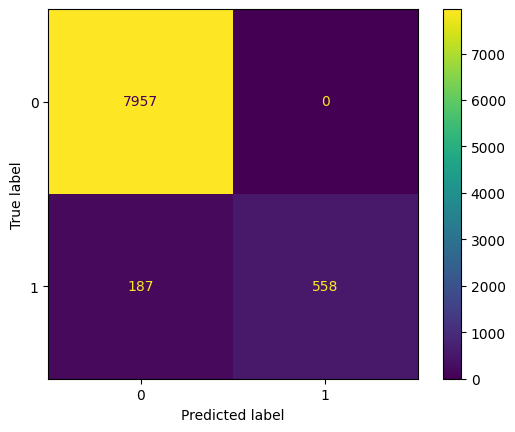

In [134]:
#Refine Logistic Regression
parameters = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}


start_time = time.time()

gridsearch_lr = GridSearchCV(LogisticRegression(), parameters, cv = 5, return_train_score = True, n_jobs = -1, verbose = 0)
gridsearch_lr.fit(X_train, y_train)

end_time = time.time()

print('Optimal hyperparameter: ', gridsearch_lr.best_params_)
print('Best score: ', gridsearch_lr.best_score_)

#metrics
y_pred_gslr = gridsearch_lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gslr)
precision = precision_score(y_test, y_pred_gslr, pos_label = 1)
recall  = recall_score(y_test, y_pred_gslr, pos_label = 1)
f1 = f1_score(y_test, y_pred_gslr, pos_label = 1)

conf_matrix = confusion_matrix(y_test, y_pred_gslr, labels = gridsearch_lr.classes_)
report = classification_report(y_test, y_pred_gslr)

disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = gridsearch_lr.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for  GridSearch Logistic Regression: ", accuracy)
print("\nClassification Report for GridSearch Logistic Regression: ")
print(report)
disp.plot()
plt.show()

#Append line of results
results_improvedmodels.append(["GS LogReg", accuracy, precision, recall, f1, end_time-start_time])


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Optimal hyperparameter:  {'n_neighbors': 7}
Best score:  0.9783657634373741
Time taken (seconds):  232.40621781349182
Accuracy for  GridSearch KNN:  0.9752930360836589

Classification Report for GridSearch KNN: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7957
           1       0.98      0.72      0.83       745

    accuracy                           0.98      8702
   macro avg       0.98      0.86      0.91      8702
weighted avg       0.98      0.98      0.97      8702



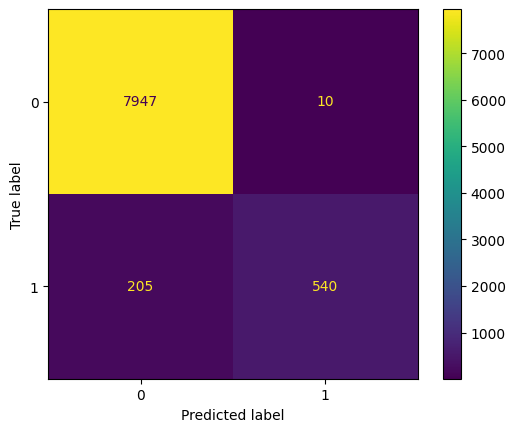

In [135]:
#Refine KNN
parameters = {'n_neighbors': np.arange(4,20,3)}

start_time = time.time()

gridsearch_knn = GridSearchCV(KNeighborsClassifier(), parameters, cv = 5, return_train_score = True, n_jobs = -1, verbose = 1)
gridsearch_knn.fit(X_train, y_train)

end_time = time.time()

print('Optimal hyperparameter: ', gridsearch_knn.best_params_)
print('Best score: ', gridsearch_knn.best_score_)

#metrics
y_pred_gsknn = gridsearch_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gsknn)
precision = precision_score(y_test, y_pred_gsknn, pos_label = 1)
recall  = recall_score(y_test, y_pred_gsknn, pos_label = 1)
f1 = f1_score(y_test, y_pred_gsknn, pos_label = 1)
conf_matrix = confusion_matrix(y_test, y_pred_gsknn, labels = gridsearch_knn.classes_)
report = classification_report(y_test, y_pred_gsknn)

disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = gridsearch_knn.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for  GridSearch KNN: ", accuracy)
print("\nClassification Report for GridSearch KNN: ")
print(report)
disp.plot()
plt.show()

#Append line of results
results_improvedmodels.append(["GS KNN", accuracy, precision, recall, f1, end_time-start_time])

Optimal hyperparameter:  {'criterion': 'gini', 'max_depth': 2}
Best score:  0.9810090040373911
Time taken (seconds):  3.7289628982543945
Accuracy for  GridSearch Decision Tree:  0.9785106871983452

Classification Report for GridSearch Decision Tree: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7957
           1       1.00      0.75      0.86       745

    accuracy                           0.98      8702
   macro avg       0.99      0.87      0.92      8702
weighted avg       0.98      0.98      0.98      8702



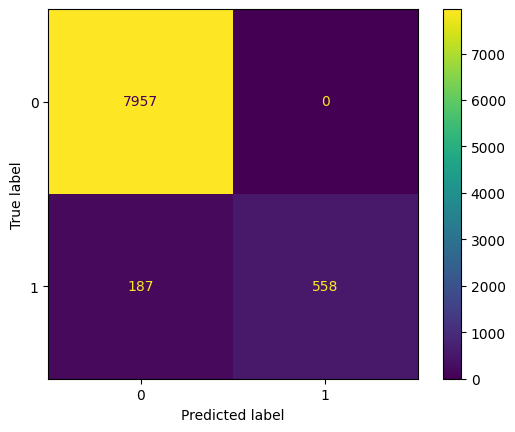

In [136]:
#Refine Decision Tree

parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8, 10],
              }

start_time = time.time()

gridsearch_dt = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5, return_train_score = True, n_jobs = -1, verbose = 0)
gridsearch_dt.fit(X_train, y_train)

end_time = time.time()

print('Optimal hyperparameter: ', gridsearch_dt.best_params_)
print('Best score: ', gridsearch_dt.best_score_)

#metrics
y_pred_gsdt = gridsearch_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gsdt)
precision = precision_score(y_test, y_pred_gsdt, pos_label = 1)
recall  = recall_score(y_test, y_pred_gsdt, pos_label = 1)
f1 = f1_score(y_test, y_pred_gsdt, pos_label = 1)

conf_matrix = confusion_matrix(y_test, y_pred_gsdt, labels = gridsearch_dt.classes_)
report = classification_report(y_test, y_pred_gsdt)

disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = gridsearch_dt.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for  GridSearch Decision Tree: ", accuracy)
print("\nClassification Report for GridSearch Decision Tree: ")
print(report)
disp.plot()
plt.show()

#Append line of results
results_improvedmodels.append(["GS DecTree", accuracy, precision, recall, f1, end_time-start_time])



Fitting 3 folds for each of 8 candidates, totalling 24 fits
Optimal hyperparameter:  {'C': 0.1, 'kernel': 'linear'}
Best score:  0.9810090214330862
Time taken (seconds):  209.95271515846252
Accuracy for  GridSearch SVC:  0.9785106871983452

Classification Report for GridSearch SVC: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7957
           1       1.00      0.75      0.86       745

    accuracy                           0.98      8702
   macro avg       0.99      0.87      0.92      8702
weighted avg       0.98      0.98      0.98      8702



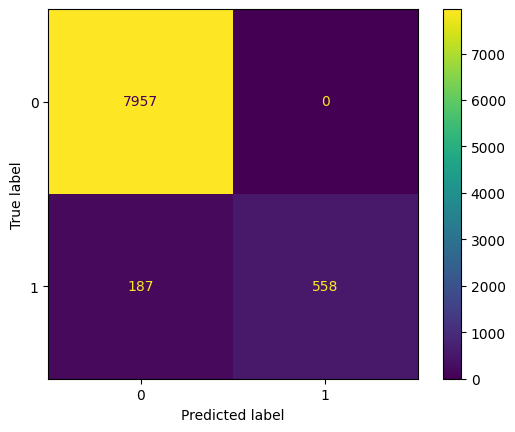

In [137]:
#Refine SVM

parameters = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf']}

start_time = time.time()

gridsearch_svc = GridSearchCV(SVC(), parameters, cv = 3, return_train_score = True, n_jobs = -1, verbose = 2)
gridsearch_svc.fit(X_train, y_train)

end_time = time.time()

print('Optimal hyperparameter: ', gridsearch_svc.best_params_)
print('Best score: ', gridsearch_svc.best_score_)

#metrics
y_pred_gssvc = gridsearch_svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gssvc)
precision = precision_score(y_test, y_pred_gssvc, pos_label = 1)
recall  = recall_score(y_test, y_pred_gssvc, pos_label = 1)
f1 = f1_score(y_test, y_pred_gssvc, pos_label = 1)

conf_matrix = confusion_matrix(y_test, y_pred_gssvc, labels = gridsearch_svc.classes_)
report = classification_report(y_test, y_pred_gssvc)

disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = gridsearch_svc.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for  GridSearch SVC: ", accuracy)
print("\nClassification Report for GridSearch SVC: ")
print(report)
disp.plot()
plt.show()

#Append line of results
results_improvedmodels.append(["GS SVC", accuracy, precision, recall, f1, end_time-start_time])


In [138]:
#Finalize results_simplemodels Fataframe
results_improvedmodels_df = pd.DataFrame(results_improvedmodels, columns = ['Model', 'Train Accuracy',  'Precision', 'Recall', \
                                                                        'F1 Score', 'Train Time'])
results_improvedmodels_df

Model  Train Accuracy  Precision    Recall  F1 Score  Train Time
0   GS LogReg        0.978511   1.000000  0.748993  0.856485    6.181499
1      GS KNN        0.975293   0.981818  0.724832  0.833977  232.406218
2  GS DecTree        0.978511   1.000000  0.748993  0.856485    3.728963
3      GS SVC        0.978511   1.000000  0.748993  0.856485  209.952715

##Analysis

In the initial stages of this project it was pointed out that since the dataset has a severe imbalance in the response classes, accuracy is not the right metric to compare models. Indeed, by accuracy measures, it would be hard to outperform the simplest of dummy classifiers, always predicting the majority class. In practice, although it seems that all the initial simple models (a simple logistic regression classifier, a simple KNN classifier, a simple decision tree and a support vector machine model) achieve higher accuracy than the dummy, they come at the cost of increased training time (as there is no training required in the dummy classifier).


Thus, it is now important to decide which alternative metric to focus on, based on the confusion matrix produced by each classifier.


Some definitions (based on the confusion matrix produced by a classifier):

|      | Predicted label 0 (no default on payment)      | Predicted label 1 (default on payment)|
| ------------- | ------------- |---|
|True label 0 (no default)| true negative (TN)|false positive (FP) |
| True label 1 (default) | false negative (FN) |true positive (TP) |

<u>Classifier Errors</u>:

* FP = false positive: the model predicts that a client will default on their credit card payment when they actually won't $\rightarrow$ a loan may be denied to a client who would actually be a good payer (lost business!).

* FN = false negative: the model predicts that a client will not default on their payment when in fact they will $\rightarrow$ lost money due to inability to collect loan repayment.

<u> Metric Candidates</u>:

* **Precision** = $\frac{TP}{TP + FP}$ = proportion of all the 'default' predictions that are actually correct.


* **Recall** = $\frac{TP}{TP + FN}$ = proportion of all the actual 'default' labels that the model was able to classify correctly.

* **f1score**  = harmonic mean of precision and recall (a combined metric that aims to balance the previous two).

In this credit card default classification problem, minimizing the false negatives means reducing the amount of money lost by the credit card issuer due to the inability to collect payment from clients who default, whereas minimizing the false positives means being able to grant more loans that will be recovered because good payers won't be denied the loan.

So as to take a position, I posit that focusing on minimizing the false negatives appears to be a valid goal from this type of institution's point of view. In this case, the criterion that determines the optimal model is maximizing recall. Nonetheless, I will also consider the f1 score, which aims to strike a balance between precision and recall, thus combining the importance of controlling (rather than minimizing) both the false negatives and the false positives, as a metric of interest.


Hence, this analysis focuses on identifying the classifier that maximizes recall, as well as presenting the one that maximizes the f1 score.



Making use of the two dataframes resulting from running the code containing the results for the simple models and for the improved models, and using the training time as 'tie breaker', the results are:


|Criterion      |Simple Model Winner      |Improved Model Winner | Notes |
| ------------- | ------------- |---| ---|
|Simplicity| Dummy classifier|NA | baseline model, no training required|
| ------------------ | -------------------------------------- |------------------------------------| ---------------------------------------------------------|
|Recall |Logistic Regression |Decision Tree | |
| | recall = 0.7678 | recall = 0.749 | this is the metric to |
| | training time: 0.11s | training time: 3.73s |focus on |
| ------------------ | -------------------------------------- |------------------------------------| ---------------------------------------------------------|
|f1 score |Decision Tree |Decision Tree | |
| | f1 = 0.8565 | f1 = 0.8565 | this is a combined metric |
| | training time: 0.14s | training time: 3.73s |showing DT as winner as well |

The resulting best hyperparametrized classification model for this application is the optimized decision tree (with hyperparameters criterion = gini and max_depth = 2), with the added advantage that it is also extremely efficient with a training time of 3.73 seconds.

It is also worth mentioning that the optimized decision tree classifier not only maximizes the recall (among the hyperparametrized models), but it also produces an accuracy that exceeds that of the basic, majority-based dummy classifier at 97.85% (compared to 91.44% for the dummy classifier). This optimal decision tree also maximizes the f1 score, the harmonic mean of precision and recall.


##Visualizing the best hyperparametrized model (Decision Tree)
 Decision Tree classifier with hyperparameters {criterion = gini, max_depth = 2}

[Text(0.4, 0.8333333333333334, 'x[5] <= -1.328\ngini = 0.147\nsamples = 34806\nvalue = [32021, 2785]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2124\nvalue = [0, 2124]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[5] <= -0.83\ngini = 0.04\nsamples = 32682\nvalue = [32021, 661]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.194\nsamples = 6063\nvalue = [5402, 661]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 26619\nvalue = [26619, 0]')]

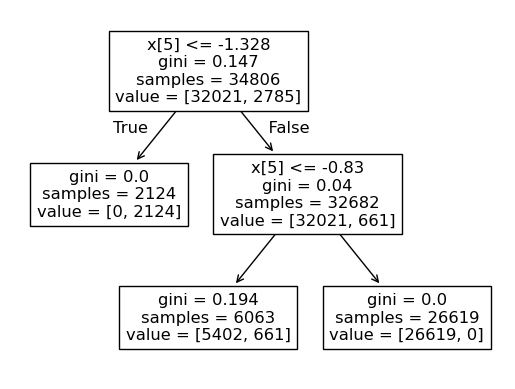

In [139]:
#Optimal Decision Tree
#Reminder: X_train was already run through preprocessor

optimal_dtree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 2).fit(X_train, y_train)
#basic plot:
tree.plot_tree(optimal_dtree)

###A better visualization of the optimal decision tree

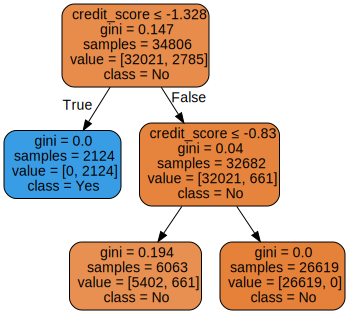

In [140]:
#Additional library for a better diagram
import graphviz


# Get feature names after preprocessing
feature_names = numerical_columns + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))

# Now you can export the decision tree with the proper feature names
dot_data = tree.export_graphviz(
    optimal_dtree,
    out_file=None,
    feature_names=feature_names,  # Use the updated feature names
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render(format="png", filename="/content/drive/My Drive/Berkeley/data/capstone/OptimalDecisionTree")
graph

##Findings of this Decision Tree Model

Note that the labels correspond to encoded features (OneHot for categorical features and StandardScaler for quantitative ones), so detailed interpretation requires reversing such transformations.

Since the only feature that appears in the resulting decision tree is the credit score, a quantitative feature, the interpretation should be made in terms of standard deviations away from the average credit score of all clients in the set: any client whose credit score is more than 1.328 standard deviations below the average credit score is predicted to default on their credit card payment.

##A look at the simple Logistic Regression Model

Although the hyperparametrized logistic regression model did not produce the maximum recall among all the "fine-tuned" models, as it turns out it produced the maximum recall all around, with a value of 0.7678 (this exceed the recall associated with the decision tree examined above).

Thus, it is of interest to examine the results of this model.

In [147]:
lr_classifier = LogisticRegression()

lr_classifier.fit(X_train, y_train)

# Get feature names from the preprocessor
feature_names = numerical_columns + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))

# Create DataFrame of coefficients, using feature_names as index
betas = pd.DataFrame(lr_classifier.coef_[0], index=feature_names, columns=['coefficient'])

# Sort by coefficient values
betas.sort_values(by='coefficient', ascending=False)


coefficient
pct                                  2.115393
prev_defaults                        1.283540
occupation_Cooking staff             0.718487
default6months_1                     0.461692
occupation_Waiters/barmen staff      0.455410
occupation_Sales staff               0.187436
occupation_Security staff            0.149623
occupation_Laborers                  0.142702
occupation_Drivers                   0.083016
age                                  0.027021
payments                             0.016877
occupation_Realty agents             0.010807
gender_XNA                          -0.006729
logincome                           -0.007594
occupation_HR staff                 -0.035619
occupation_Low-skill Laborers       -0.040401
family                              -0.068839
occupation_Core staff               -0.089211
occupation_Medicine staff           -0.092187
occupation_IT staff                 -0.101813
days                                -0.174623
occupation_Secretaries              -0.244129
occupation_Accountants              -0.269164
occupation_Unknown                  -0.320732
occupation_Cleaning staff           -0.329130
occupation_Managers                 -0.409929
gender_M                            -0.660596
occupation_High skill tech staff    -0.728775
car_N                               -0.789931
migrant_1.0                         -0.819817
house_N                             -0.884912
occupation_Private service staff    -0.888891
house_Y                             -0.917585
migrant_0.0                         -0.982680
car_Y                               -1.012566
gender_F                            -1.135171
default6months_0                    -2.264188
credit_score                        -4.337939

This list shows the coefficients of the logistic regression for 'y' as a function of *all* the (encoded) predictors.

While the interpretation of each of these coefficients may be cumbersome, we can produce the following insights:

* features whose estimated coefficient is positive are associated with increased odds that the value of 'y' will be equal to 1 (that is, that the client will default on their credit card payment); and
* features whose estimated coefficient is negative are associated with decreased odds that the value of 'y' will be equal to 1 (that is, they are associated with lower odds that the client will default).

In both cases, the technical interpretation requires to specify that all other features be held constant/unchanged. With so many encoded features, this makes for a complex comprehension exercise. However, we can extract a couple of examples to illustrate the results:

<u> Positive coefficients: </u>
* 'pct': Holding every other feature constant, for every additional percent point of credit utilization, the odds of the client defaulting on their credit card payment increase by $e^{2.115393} \approx 8.29$ or 829\%.
* 'prev_defaults': Holding every other feature constant, for every additional default the client has had in the past, the odds of them defaulting on their credit card payment increase by $e^{1.28354} \approx 6.27$ or 627\%.
* 'occupation_Cooking staff': (this is a dummy/binary/encoded variable, which affects the interpretation slightly). Clients whose occupation is Cooking staff have $e^{0.718487} \approx 2.05$ of approximately double the odds of defaulting on their credit card payment, compared to clients who do not have this occupation.

<u> Negative coefficients: </u>

* 'logincome': for every additional standard deviation above the average logarithm of incomes in the set that a client has, their odds of defaulting on their credit card payment decrease by $1 - e^{-0.007594}\approx 1-0.9924\approx$ 0.007565 or 0.7565%.
* 'occupation_IT staff': (dummy/binary/encoded) Clients whose occupation is IT staff have $1-e^{-0.101813} \approx 1- 0.9032 \approx$9.69% lower odds of defaulting on their credit card payment, compared to clients with other occupation.
* 'credit_score': for every additional standard deviation that a client's credit score is above the average, the odds of them defaulting on their credit card payment is reduced by $1-e^{-4.337939}\approx 1-0.013\approx$98.7%!


What about the 'optimized' (hyperparametrized) logistic regression model? This did not turn out to be the best, but it did achieve improvement in accuracy, precision, and f1 score. It is worth taking a look at the results, given that the penalty term is meant to simplify the results.

In [144]:
# Fit the Ridge Logistic Regression model
# the best parameters found by GridSearchCV are l2 (hence ridge logistic regression) and C = 0.01
ridgelr = LogisticRegression(penalty='l2', C = 0.01)
ridgelr.fit(X_train, y_train)

# Get feature names from the preprocessor
feature_names = numerical_columns + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))

# Create DataFrame of coefficients, using feature_names as index
betasridge = pd.DataFrame(ridgelr.coef_[0], index=feature_names, columns=['coefficient'])

# Sort by coefficient values
betasridge.sort_values(by='coefficient', ascending=False)

coefficient
pct                                  1.328003
prev_defaults                        0.964954
default6months_1                     0.349208
gender_M                             0.145485
occupation_Laborers                  0.104910
occupation_Drivers                   0.083710
occupation_Cooking staff             0.080553
occupation_Sales staff               0.071984
car_N                                0.062084
migrant_1.0                          0.044370
occupation_Security staff            0.044108
occupation_Waiters/barmen staff      0.032782
age                                  0.012048
occupation_Low-skill Laborers        0.011724
house_N                              0.002495
occupation_Realty agents             0.002289
occupation_HR staff                  0.000319
gender_XNA                          -0.000391
occupation_Medicine staff           -0.005616
occupation_IT staff                 -0.008202
house_Y                             -0.008725
payments                            -0.011099
occupation_Cleaning staff           -0.011151
occupation_Secretaries              -0.016568
occupation_Accountants              -0.028847
logincome                           -0.030476
family                              -0.037171
occupation_Core staff               -0.037775
migrant_0.0                         -0.050600
occupation_Private service staff    -0.052768
car_Y                               -0.068314
occupation_Managers                 -0.073272
occupation_High skill tech staff    -0.077494
occupation_Unknown                  -0.126916
days                                -0.147714
gender_F                            -0.151325
default6months_0                    -0.355438
credit_score                        -2.152957

In [152]:
b = betas.join(betasridge, lsuffix='_betas', rsuffix='_betasridge')
b.sort_values(by=['coefficient_betas', 'coefficient_betasridge'], ascending=False)

coefficient_betas  coefficient_betasridge
pct                                        2.115393                1.328003
prev_defaults                              1.283540                0.964954
occupation_Cooking staff                   0.718487                0.080553
default6months_1                           0.461692                0.349208
occupation_Waiters/barmen staff            0.455410                0.032782
occupation_Sales staff                     0.187436                0.071984
occupation_Security staff                  0.149623                0.044108
occupation_Laborers                        0.142702                0.104910
occupation_Drivers                         0.083016                0.083710
age                                        0.027021                0.012048
payments                                   0.016877               -0.011099
occupation_Realty agents                   0.010807                0.002289
gender_XNA                                -0.006729               -0.000391
logincome                                 -0.007594               -0.030476
occupation_HR staff                       -0.035619                0.000319
occupation_Low-skill Laborers             -0.040401                0.011724
family                                    -0.068839               -0.037171
occupation_Core staff                     -0.089211               -0.037775
occupation_Medicine staff                 -0.092187               -0.005616
occupation_IT staff                       -0.101813               -0.008202
days                                      -0.174623               -0.147714
occupation_Secretaries                    -0.244129               -0.016568
occupation_Accountants                    -0.269164               -0.028847
occupation_Unknown                        -0.320732               -0.126916
occupation_Cleaning staff                 -0.329130               -0.011151
occupation_Managers                       -0.409929               -0.073272
gender_M                                  -0.660596                0.145485
occupation_High skill tech staff          -0.728775               -0.077494
car_N                                     -0.789931                0.062084
migrant_1.0                               -0.819817                0.044370
house_N                                   -0.884912                0.002495
occupation_Private service staff          -0.888891               -0.052768
house_Y                                   -0.917585               -0.008725
migrant_0.0                               -0.982680               -0.050600
car_Y                                     -1.012566               -0.068314
gender_F                                  -1.135171               -0.151325
default6months_0                          -2.264188               -0.355438
credit_score                              -4.337939               -2.152957

The interpretations would now be modified to adjust for the changes in the resulting coefficients (the resulting numerical "multipliers" will be dampened as a result of the L2 penalty in the ridge logistic regression model).

##Findings of the Analysis / Actionable Items

**Hyperparametrized Decision Tree**: produces the highest recall and f1 score among the hyperparametrized models at a fraction of the cost in terms of training time. The result is an ultra simple model where the only relevant feature is the clients' credit score. Any client whose credit score falls below 1.328 standard deviations under the average credit score is associated with a prediction of default on their credit card payment. The obvious advantage of this model is its simplicity, though it can also be considered a limitation in terms of not making use of any other available information.

**Logistic Regression/ Ridge Logistic Regression**: the regular logistic regression produces the overall highest recall of all the models considered in this project. The result is a logistic regression equation with the coefficients presented in the previous section. The appeal of such a model is that all the features in the set can be ranked in terms of importance and of their quantitative effect on the odds of a client defaulting on their credit card payment. Thus, it becomes apparent that the features that increase such odds the most are: the percentage of the credit limit used by the client, the number of previous defaults they have on their record, whether they have a default in the previous 6 months, and occupations in the general categories of Cooking/Waiting/Sales/Security. On the other hand, the features that decrease the odds of a client defaulting on their credit card payment the most are: their credit score, not having defaulted on payments in the last 6 months, feminine gender, owning a car and/or a house, and not being a migrant.


##Limitations and Potential Future Steps

The severe imbalance in the target variable affects these results, as ideally we would want to assess a classifier in terms of its accuracy (or "overall correctness"). A future step in this project should be to address this issue through the use of an appropriate technique.